<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Aditya, my name is Dmitrii. Happy to review your project again! 🙌

As usual you can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
Once again you achieved a very high level of the project! 
    
No critial issues/comments, however I want to return the project back to make sure that all my comments are clear. 
    
If you have time you can check my yellow comments. If not you can send the same project, so I can accept it.
Come back soon! :)

</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 

Hi Aditya, thank you for leaving your comments/feedback in the project and going an extra mile improving it :)\
No critial issues left and everything is perfect now.

Please keep up the great work and good luck on the next project! 
</div>

## Project Description

An online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. The goal is to identify patterns that determine whether a game succeeds or not. This will allow to spot potential big winners and plan advertising campaigns.

Data going back to 2016 is analyzed. Let’s imagine that it’s December 2016 and we’re planning a campaign for 2017.

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

Table of Contents:

1. [Opening the dataset and looking at the general information](#1.-Opening-the-dataset-and-looking-at-the-general-information)

2. [Preprocessing the data](#2.-Preprocessing-the-data)

3. [Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)

4. [Creating a user profile for each region](#4.-Creating-a-user-profile-for-each-region)

5. [Testing Hypotheses](#5.-Testing-Hypotheses)

6. [Overall Conclusion](#6.-Overall-Conclusion)

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
- Great that you added additional information about the project goal and tasks.

</div>

In [1]:
#importing of libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#some global constats for formatting the output string
BOLD = '\033[1m'
END = '\033[0m'

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Opening the dataset and looking at the general information

In [2]:
#reading file that contains the video games sells data  
try:
    games_data = pd.read_csv('C:/Users/SkyNET/Desktop/Learn python/Projects/Integrated Project 1/games.csv')
except:
    games_data = pd.read_csv('/datasets/games.csv')
#looking at the data's general information. 
print(BOLD + 'General information:' + END)
print(games_data.info())
print()

#looking at the first few rows in a table
print(BOLD + 'The first few rows in a dataset:' + END)
display(games_data.head())

General information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

The first few rows in a dataset:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great that all imports are grouped in different cells before the project. 

Good, that you use try/except to check data import. 
</div>

The table contains 16,715 rows for 11 features.

A pair of values are missing in the *'Name'* and *'Genre'* columns. Around 250 values are missing in the *'Year_of_Release'* column. And half of values in the *'Critic_Score', 'User_Score'* and *'Rating'* columns are also missing.

For the columns *'Year_of_Release'* and *'Critic_Score'* float64 is used. It looks like these columns contain integer values. For the columns *'User_Score'* object is used. It seems it should be numerical values.

Let us check if *'Year_of_Release'* and *'Critic_Score'* have only integer values

In [3]:
print(BOLD + "Are all values of 'Year_of_Release' column integer?" + END)
print(games_data[games_data.Year_of_Release.notnull()].Year_of_Release.apply(float.is_integer).all())
print()
print(BOLD + "Are all values of 'Critic_Score' column integer?" + END)
print(games_data[games_data.Critic_Score.notnull()].Critic_Score.apply(float.is_integer).all())

Are all values of 'Year_of_Release' column integer?
True

Are all values of 'Critic_Score' column integer?
True


We can conclude that float64 is excessive for *'Year_of_Release'* and *'Critic_Score'* columns, it would be enough to use integer type for them.

We will look at numerical and categorical features in more detail.

In [4]:
#creating the corresponding lists
numeric_cols = ['Year_of_Release', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score']
categorical_cols = ['Platform', 'Genre', 'Rating', 'User_Score']

#function to find the minimum positive number in a series. 
def positive_min(series):
    return min([x for x in series.dropna() if x > 0])

#looking at the values that take numerical features 
print(BOLD + 'The values that take numerical features:' + END)
display(games_data[numeric_cols].agg(['min', positive_min, 'max', 'mean', 'median', 'std']).T)
print('\n')

#Let's look at the values that take categorical features 
print(BOLD + 'The number of different names of game:' + END, games_data.Name.nunique())
print()
print(BOLD + 'The values that take categorical features ' + END + "(except 'Name' feature):")
print(BOLD + "Rem.:" + END + "'User_Score' is assigned to categorical features to see why the type is object, " +\
          "although it should be a numerical type")
#for new version of pandas 
#pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_colwidth', -1)
display(games_data[categorical_cols].sort_values('User_Score').agg(['unique', 'nunique']).T)

The values that take numerical features:


,min,positive_min,max,mean,median,std
Year_of_Release,1980.0,1980.00,2016.00,2006.484616,2007.00,5.877050
NA_sales,0.0,0.01,41.36,0.263377,0.08,0.813604
EU_sales,0.0,0.01,28.96,0.145060,0.02,0.503339
JP_sales,0.0,0.01,10.22,0.077617,0.00,0.308853
Other_sales,0.0,0.01,10.57,0.047342,0.01,0.186731
Critic_Score,13.0,13.00,98.00,68.967679,71.00,13.938165




The number of different names of game: 11559

The values that take categorical features (except 'Name' feature):
Rem.:'User_Score' is assigned to categorical features to see why the type is object, although it should be a numerical type


,unique,nunique
Platform,"[DS, Wii, PS3, XB, PSP, X360, PS, PC, GC, PS4, XOne, GBA, PS2, PSV, 3DS, WiiU, DC, NES, GB, SNES, N64, 2600, GEN, SAT, SCD, WS, NG, TG16, 3DO, GG, PCFX]",31
Genre,"[Adventure, Platform, Sports, Action, Racing, Misc, Strategy, Fighting, Puzzle, Shooter, Role-Playing, Simulation, nan]",12
Rating,"[E, T, E10+, M, nan, RP, EC, K-A, AO]",8
User_Score,"[0, 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, tbd, nan]",96


The dataset contains data on 11,559 video games released on 31 game platforms including PCs for 37 years, from 1980 to 2016, with sales in the North American, European, Japanese, and other markets ranging from $10,000 to $10-40 million per game. On average, game sales range from $10,000 to $80,000, depending on the market. The mean of sales is much greater than the median, this implies that there are outliers. But we shouldn't delete them, as games with huge sales values are bestsellers. There are no NaN values for sales, so zero value may correspond to the case when this version of the game was not released in a certain market.

The values of *'Critic_Score'* feature range from 13 to 98 points. Thus it would be enough int8 for it.

There are 12 game genres and a couple of unknown values for *'Genre'* column. There are 8 type of ESRB Ratings. There are unknown values for *'Rating'* column.

The column *'User_Score'* contains, in addition to the numerical values and unknown values, the 'tbd' value.

Now, let us look at distribution of numerical features.

Histograms for numerical features


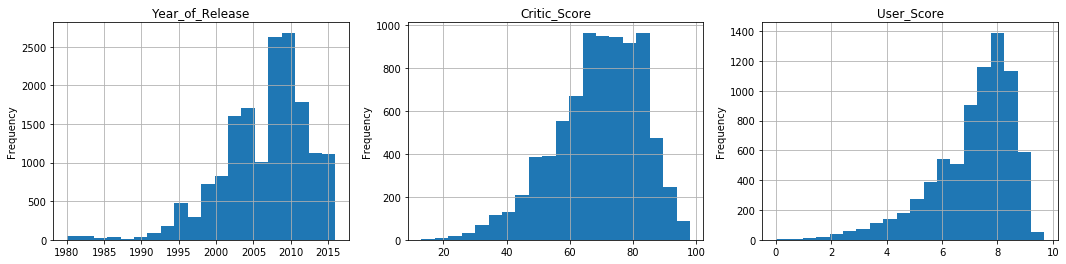

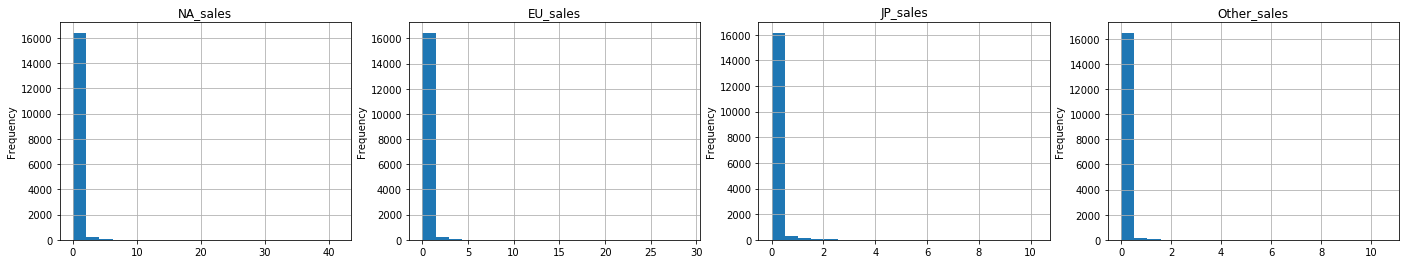

In [5]:
#function to plot several histograms in one line
def hist_in_row(cols, bins_num=None):
    cols_num = len(cols)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(6*cols_num, 4))
    for i, col in enumerate(cols):
        if col == 'User_Score':
            pd.to_numeric(games_data[games_data.User_Score!='tbd'].User_Score)\
                .hist(ax=axes[i], bins=bins_num);      
        else:
            games_data[col].hist(ax=axes[i], bins=bins_num)
        axes[i].set_title(col)
        axes[i].set_ylabel('Frequency')
        
print(BOLD + 'Histograms for numerical features' + END)
hist_in_row(['Year_of_Release', 'Critic_Score', 'User_Score'], 20)
hist_in_row(['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales'], 20)

Most of the games have been released in the last 10 years. The distribution of *'Year_of_Release'* feature is negatively skewed.

The distribution of *'Critic_Score'* and *'User_Score'* feature is also negatively skewed. Thus, there are more high ratings than low ones. Moreover, for user scores, the bias is greater towards higher values.

There are some outliers with huge sales values for all markets, most of the sales are less than $1 million.

Now, we look at not zero sales without huge values.

Histograms for not zero sales without huge values:


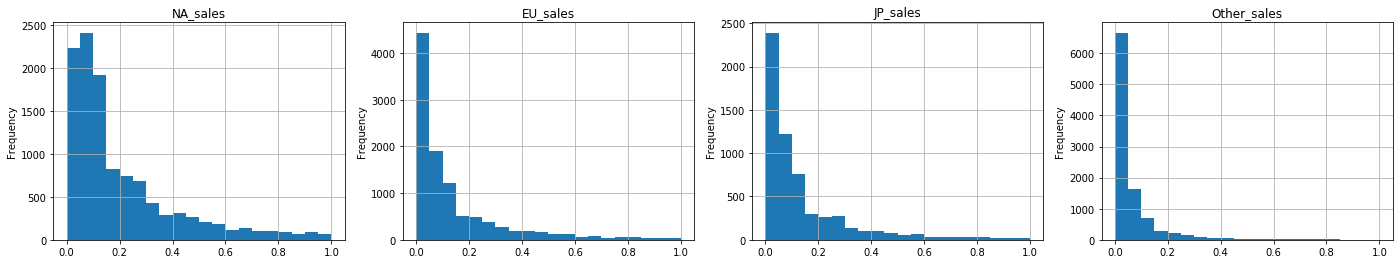

In [6]:
#function to plot several histograms of only positive values in one line
def hist_pos_in_row(cols, bins_num=None, lims=None):
    cols_num = len(cols)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(6*cols_num, 4))
    for i, col in enumerate(cols):
        games_data[games_data[col]>0][col].hist(ax=axes[i], bins=bins_num, range=lims)
        axes[i].set_title(col)
        axes[i].set_ylabel('Frequency')

print(BOLD + 'Histograms for not zero sales without huge values:' + END)
hist_pos_in_row(['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales'], 20, (0, 1))

We see that the sales have strong positively skewed distributions.

And now, we will look at 'tbd' values in *'User_Score'* column.

The number of 'tbd' values in 'User_Score' column is 2424 which is 14.5%

Some statistics for numerical features for cases where User_Score is 'tbd' and not:


User Score is tbd                                         \
                           min positive_min    max       mean  median   
NA_sales      0.0               0.01         3.45   0.126052   0.075    
EU_sales      0.0               0.01         2.59   0.043519   0.010    
JP_sales      0.0               0.01         0.86   0.002727   0.000    
Other_sales   0.0               0.01         1.09   0.015862   0.010    
Critic_Score  23.0              23.00        90.00  60.711645  62.000   

             User Score is not tbd                                        
                               min positive_min    max       mean median  
NA_sales      0.0                   0.01         41.36  0.286670   0.08   
EU_sales      0.0                   0.01         28.96  0.162283   0.03   
JP_sales      0.0                   0.01         10.22  0.090320   0.00   
Other_sales   0.0                   0.01         10.57  0.052681   0.01   
Critic_Score  13.0                  13.00        98.00  70.233877  72.00

Distribution for numerical features for cases where User_Score is 'tbd' and not:


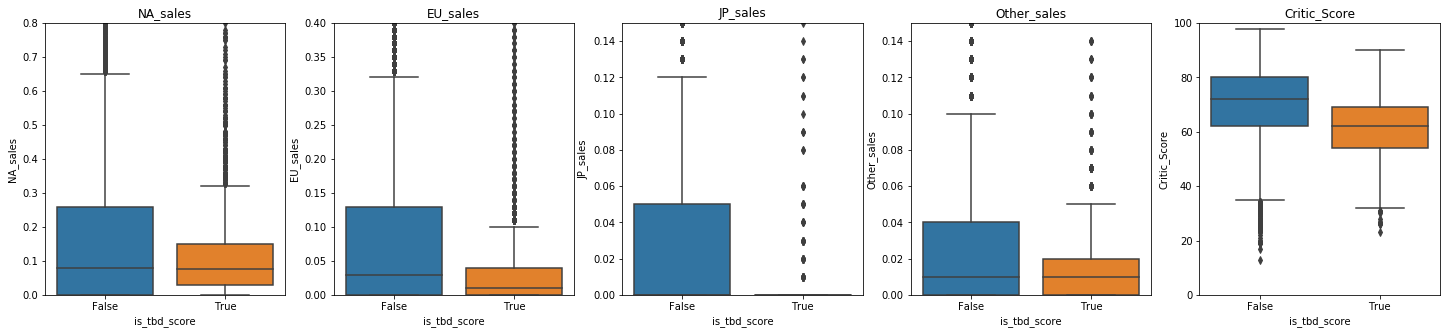

Some statistics for Percent of 'tbd' values by categorical features:


feature,Platform,Year_of_Release,Genre,Rating
min,0.00,0.00,2.00,0.00
positive_min,1.53,0.35,2.00,2.69
mean,6.52,6.56,15.35,21.07
median,1.53,0.35,13.93,7.76
max,35.15,28.40,36.38,87.50


In [7]:
#calulating the number of 'tbd' values and its share
tbd_count = len(games_data[games_data.User_Score=='tbd'])
print(BOLD + "The number of 'tbd' values in 'User_Score' column is" + END, tbd_count,
      BOLD + "which is " + END + '{:.1%}'.format(tbd_count/len(games_data)))
print()


print(BOLD + "Some statistics for numerical features for cases where User_Score is 'tbd' and not:" + END)
d = {}
d['User Score is tbd'] = games_data[games_data.User_Score=='tbd']\
                             [['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score']]\
                            .agg(['min', positive_min, 'max', 'mean', 'median']).T
pd.concat(d, axis=1)
d['User Score is not tbd'] = games_data[games_data.User_Score!='tbd']\
                                [['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score']]\
                            .agg(['min', positive_min, 'max', 'mean', 'median']).T
display(pd.concat(d, axis=1))

#function to plot boxplots for numerical features for cases where User_Score is 'tbd' and not
def boxplots_is_tbd_in_row(features, ylims=None):
    cols_num = len(features)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(5*cols_num, 5))
    for i, feature in enumerate(features):
        sns.boxplot(y=feature, x='is_tbd_score', ax = axes[i],
                    data=games_data.assign(is_tbd_score = games_data.User_Score=='tbd'));
        axes[i].set_title(feature)
        axes[i].set_ylim(ylims[i])

print(BOLD + "Distribution for numerical features for cases where User_Score is 'tbd' and not:" + END)
boxplots_is_tbd_in_row(['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score'],
                       [(0, 0.8), (0, 0.4), (0, 0.15), (0, 0.15), (0, 100)]) 
plt.show()

#function to calculate statistics for percent of 'tbd' values by categorical features
def tbd_value_share_by_features(data, features):
    tbd_share_dict = {'feature':[], 'min':[], 'positive_min':[], 'mean':[], 'median':[], 'max':[]}
    for feature in features:
        shares = (data[data.User_Score=='tbd'][feature].value_counts()/data[feature].value_counts()*100).fillna(0)
        tbd_share_dict['feature'].append(feature)
        tbd_share_dict['min'].append(shares.min())
        tbd_share_dict['positive_min'].append(min([x for x in shares if x > 0]))
        tbd_share_dict['mean'].append(shares.mean())
        tbd_share_dict['median'].append(shares.median())
        tbd_share_dict['max'].append(shares.max())
    return round(pd.DataFrame(tbd_share_dict).set_index('feature'),2)

print(BOLD + "Some statistics for Percent of 'tbd' values by categorical features:" + END)
display(tbd_value_share_by_features(games_data, ['Platform', 'Year_of_Release', 'Genre', 'Rating']).T)

There are quite a lot 'tbd' values in *'User_Score'* column - 14.5%.

'tbd' values do not correspond to any specific values of other numerical features. Sales in Europe are a little less on average, as well as critics scores (see the median), but the inter-quartile ranges are overlaping. 'tbd' values are mainly for games that were not released in the Japanese market, but there are also other user scores for games that were not released in the Japanese market.

There is no platform, release year, game genre, or rating for which user scores have only been filled with 'tbd'. For any genre, there are at least 2 User Scores values with 'tbd'. For one of the ratings, the percentage of such values is quite high - 87.5%.

Now we take a look at the shares of'tbd' values by *'Rating'* and by *'Year_of_Release'* (to see the shares for the latest data).

The number and percent of 'tbd' values by 'Rating' values:


,count,tbd_count,tbd_share
Rating,,,
AO,1,0.0,0.00
E,3990,1575.0,39.47
E10+,1420,370.0,26.06
EC,8,7.0,87.50
K-A,3,0.0,0.00
M,1563,42.0,2.69
RP,3,0.0,0.00
T,2961,380.0,12.83


The number and percent of 'tbd' values by 'Year_of_Release':


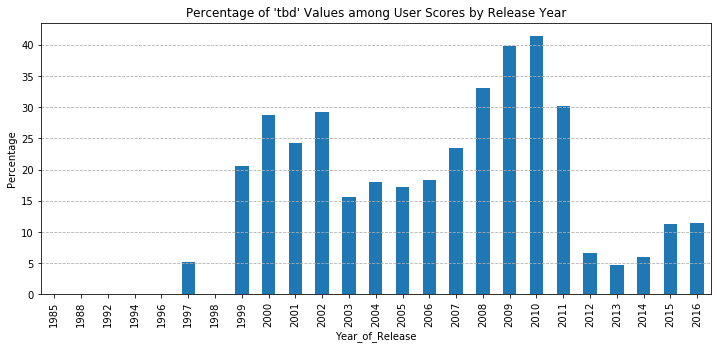

In [8]:
#function to calculate the number and percent of 'tbd' values by feature
def tbd_value_by_feature(data, feature):
    feature_counts = data.groupby(feature).agg({feature:['count']})
    tbd_counts = data[data.User_Score=='tbd'].groupby(feature).agg({feature:['count']})
    tbd_by_feature = feature_counts.join(tbd_counts, rsuffix='_tbd').fillna(0)  
    tbd_by_feature.columns = ['count', 'tbd_count']    
    tbd_by_feature['tbd_share'] = round(tbd_by_feature.tbd_count / tbd_by_feature['count'] * 100, 2)
    return tbd_by_feature

print(BOLD + "The number and percent of 'tbd' values by 'Rating' values:" + END)
display(tbd_value_by_feature(games_data, 'Rating'))

print(BOLD + "The number and percent of 'tbd' values by 'Year_of_Release':" + END)
tbd_share_by_years = tbd_value_by_feature(games_data[games_data.User_Score.notnull()], 'Year_of_Release').tbd_share
tbd_share_by_years.index = tbd_share_by_years.index.astype('int16')
ax = tbd_share_by_years.plot(kind='bar', figsize=(12, 5));
ax.set_title("Percentage of 'tbd' Values among User Scores by Release Year");
ax.set_ylabel('Percentage');
ax.grid(axis='y', linestyle='--');

The share of 87.5% 'tbd' values corresponds to the 'EC' rating, but there are quite a few games with such a rating, only 8. Note that there are also very few games with 'AO', 'K-A' and 'RP' ratings.

Quite a lot games released from 1999 to 2011 have user 'tbd' score. The last 5 years, there are much fewer such values.

Thus, no dependence of the appearance of the 'tbd' score on the values of other features was found, and 'tbd' value can be replaced with an unknown one, but add a column corresponding to the binary feature whether the 'tbd' score was or not.

### Conclusion

The dataset contains information about 16,715 video games released in a certain year and on a certain platform. The games were released for 37 years, from 1980 to 2016, in the markets of North America, Europe, Japan and other countries. Game sales range from $10,000 to $80,000 on average depending on the market. There are 31 gaming platforms and 12 game genres. There are 8 types of ESRB ratings, 4 of which are extremely rare.

The following problems in the data could be identified:

- unknown values for Names and Genres for a couple of games
- misssing values for Year of Release, Critic and User Scores, and ESRB Ratings
- there are outliers with huge Sales
- among the numerical values of User Scores, there are 'tbd'(to be determined) values

Thus, it is necessary to investigate the missing values and to filter out outliers or consider them separately since they make a lot of revenue. The appearance of the 'tbd' score was not found to depend on the values of other characteristics. The value 'tbd' can be replaced with an unknown one and a column corresponding to the binary feature can be added, depending on whether the score was 'tbd' or not, so as not to lose this information from the dataset.

The distribution of *'Critic_Score'* and *'User_Score'* feature is also negatively skewed. Thus, there are more high ratings than low ones. The Sales have strong positively skewed distributions.

In addition, the types of the columns *'Year_of_Release'* and *'Critic_Score'* can be converted to the types int16 and int8 accordingly. The type of the column *'User_Score'* can be converted to the numeric type after replacing 'tbd' values with NaN ones.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Well done! Very detailed data preview.

## 2. Preprocessing the data

First we replace the column names, making them lowercase in order to make it convenient to work with them.

In [9]:
games_data.columns = games_data.columns.str.lower()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Correct. The most typical approach is to use snake case first_name. You can read about it here - https://levelup.gitconnected.com/case-styles-in-python-fd9591e57f86 

</div>

Now we convert excess type with help of astype() method.

In [10]:
games_data['year_of_release'] = games_data.year_of_release.astype('Int16') 
games_data['critic_score'] = games_data.critic_score.astype('Int8')

We save the 'tbd' score in *'user_score'* in an additional column and change the rating to Nan value for further type conversion.

In [11]:
games_data['is_tbd_score'] = games_data.user_score=='tbd'
games_data['user_score'].replace({'tbd':np.nan}, inplace=True)

We also convert the strings to numeric type to make it convenient to work with it.

In [12]:
games_data['user_score'] = pd.to_numeric(games_data.user_score)

Now let us look at the general information of the dataset again.

In [13]:
print(BOLD + 'The general information after type replacement:' + END)
games_data.info()

The general information after type replacement:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int16  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int8   
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  is_tbd_score     16715 non-null  bool   
dtypes: Int16(1), Int8(1), bool(1), float64(5), object(4)
memory usage: 1.2+ MB


Feature names have been converted to lowercase for more convenient work with them.
Excess types for column *'year_of_release'* and *'critic_score'* were converted to appropriate ones. 
The type of the column *'user_score'* was converted to the numeric one after replacing 'tbd' values with NaN ones.

### Processing Missing Values

Now let us look at games with null values in name or genre.

In [14]:
print(BOLD + "The games with null values in 'name' or 'genre' column:" + END)
display(games_data[games_data.name.isnull()|games_data.genre.isnull()])

The games with null values in 'name' or 'genre' column:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,is_tbd_score
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN,False
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN,False


We will also have a look at the number and percentage of missing values in years of release, scores and ratings.

In [15]:
#creating list of features with missing values
features_with_null = ['year_of_release', 'rating', 'critic_score', 'user_score']

#function to calculate the number and percentage of missing values
def missing_values_stat(data):
    return pd.DataFrame({'missing_count': data.isnull().sum(),
                      'missing_percent': round(data.isnull().sum() * 100 / len(data), 1)})

#function to calculate percent of missing values among other features with null values
def missing_values_among_other_features(features):
    d = {}
    d['feature'] = features
    for x in features:
        null_cross = []
        for y in features:
            null_cross.append(len(games_data[games_data[x].isnull()&games_data[y].isnull()]))
        d[x + ' is null'] = null_cross
    return round((pd.DataFrame(d).set_index('feature')*100)\
                 .div(games_data[features_with_null].isnull().sum().values, axis=1), 2)
    
print(BOLD + "The number, percentage of missing values and percentage of missing values among other null values:"
          + END)
d = {}
d[' '] = missing_values_stat(games_data[features_with_null])
pd.concat(d, axis=1)
d['percent of missing values among'] = missing_values_among_other_features(features_with_null)
display(pd.concat(d, axis=1))

The number, percentage of missing values and percentage of missing values among other null values:


percent of missing values among  \
                missing_count missing_percent         year_of_release is null   
year_of_release  269           1.6             100.00                           
rating           6766          40.5            32.71                            
critic_score     8578          51.3            42.75                            
user_score       9125          54.6            52.79                            

                                                                        
                rating is null critic_score is null user_score is null  
year_of_release  1.30           1.34                 1.56               
rating           100.00         77.91                73.21              
critic_score     98.77          100.00               87.73              
user_score       98.73          93.32                100.00

For two games released in 1993 on the GEN platform, the name and genre are unknown, as well as the scores of critics and users and the ESRB ratings. Perhaps this is the same game, the sales in Japan of which is recorded on a separate line of the dataset. Since this is not the most actual platform, these two unknown games may not be considered in further analysis.

The dataset contains slightly more than 1.5% missing years of released, 40% missing ESRB ratings and about 50% critic and user scores. If there is no ESRB rating, then there are no scores from critics and users in almost 99% of cases. If a game does not have a critic score, then there is no user score in 93% of cases.

Perhaps ratings and scores can be restored by value on another platform for a given game. It is necessary to check if the rating and scores are the same for different platforms.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
It is indeed helpful to check not only the total amount of missing values in each column but also look at the percentage of missing values. It helps to understand the overall impact. 


We will drop the rows with null game name.

In [16]:
games_data.dropna(subset = ['name'], inplace=True)

Two games with unknown name have been removed.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
Agree. Very small amount of data could be also just deleted. Also applicable to genre.

Let us also check if the rating and scores are the same for different platforms.

In [17]:
#creating table with unique values of characteristics for given game
names_df = games_data.groupby(['name']).agg({'year_of_release':['unique'],
                                             'platform':['unique'],
                                             'rating':['nunique', 'unique'],
                                             'critic_score':['nunique', 'unique'],
                                             'user_score':['nunique', 'unique']})
names_df.columns = ['_'.join(col).strip() for col in names_df.columns.values]

print(BOLD + "Are there different ratings for a given game?" + END)
display(names_df.sort_values('rating_nunique', ascending=False).query('rating_nunique>1')\
    [['year_of_release_unique', 'platform_unique', 'rating_unique']])

print(BOLD + "Are there different scores for a given game?" + END)
display(names_df.query('critic_score_nunique>1 or user_score_nunique>1')\
    [['year_of_release_unique', 'platform_unique', 'critic_score_unique', 'user_score_unique']])

Are there different ratings for a given game?


,year_of_release_unique,platform_unique,rating_unique
name,,,
The Sims 2: Castaway,[2007],"[Wii, PSP, DS, PS2]","[T, E10+, E]"
DiRT 2,[2009],"[PS3, X360, Wii, PSP, DS, PC]","[T, E10+, E]"
WRC: FIA World Rally Championship,"[<NA>, 2005]","[PS3, X360, PSP, PC]","[nan, E10+, E, RP]"
"The Chronicles of Narnia: The Lion, The Witch and The Wardrobe","[<NA>, 2005]","[GBA, PS2, GC, XB, DS]","[E, T, E10+]"
Dawn of Discovery,[2009],"[PC, Wii, DS]","[T, E10+, E]"
...,...,...,...
Thrillville: Off the Rails,[2007],"[Wii, PS2, X360, PSP, DS]","[E10+, E]"
The Urbz: Sims in the City,[2004],"[PS2, GBA, GC, XB]","[T, E]"
Karaoke Revolution,"[2009, 2003, 2004]","[Wii, PS2, X360, PS3, XB]","[T, E]"


Are there different scores for a given game?


,year_of_release_unique,platform_unique,critic_score_unique,user_score_unique
name,,,,
007: Quantum of Solace,[2008],"[X360, PS3, Wii, PS2, DS, PC]","[65, 54, <NA>, 70]","[7.1, 6.6, 7.5, nan, 6.3]"
18 Wheeler: American Pro Trucker,"[2001, 2002]","[PS2, GC]","[61, 52]","[5.7, 6.8]"
187: Ride or Die,[2005],"[PS2, XB]","[52, 51]","[6.8, 6.9]"
2002 FIFA World Cup,[2002],"[PS2, XB, GC]","[73, 79, 78]","[5.6, 9.0, 7.7]"
2010 FIFA World Cup South Africa,[2010],"[PS3, X360, PSP, Wii]","[82, 83, 69, 70]","[7.8, 8.1, 7.4, 6.7]"
...,...,...,...,...
[Prototype 2],[2012],"[X360, PS3, PC]","[74, 79, 76]","[7.0, 6.8, 6.4]"
[Prototype],[2009],"[X360, PS3]","[78, 79]","[7.8, 7.7]"
de Blob 2,[2011],"[PS3, Wii, X360, DS]","[74, 79, 77, 75]","[7.1, 8.1, 7.5, 8.2]"


Thus, for the same game on different platforms there may be different ratings or different scores from critics or users. We will consider missing ratings or scores as absent data.

Note that the game title "2002 FIFA World Cup" contains the year the game was released. Perhaps we can restore the release year by the name of the games.

We need to investigate missing values for each feature.

Investigation of 'year_of_release' missing values
Some statistics for numerical features for cases where 'year_of_release' is null or not:


year_of_releaseis null                                        \
                                min positive_min    max       mean median   
na_sales      0.0                    0.01         4.26   0.219888   0.09    
eu_sales      0.0                    0.01         2.36   0.090929   0.02    
jp_sales      0.0                    0.01         0.77   0.024907   0.00    
other_sales   0.0                    0.01         0.71   0.032007   0.01    
critic_score  22.0                   22.00        94.00  67.584416  70.00   
user_score    1.8                    1.80         9.50   7.049606   7.40    

             year_of_releaseis not null                                        
                                    min positive_min    max       mean median  
na_sales      0.0                        0.01         41.36  0.264012   0.08   
eu_sales      0.0                        0.01         28.96  0.145930   0.02   
jp_sales      0.0                        0.01         10.22  0.078487   0.00   
other_sales   0.0                        0.01         10.57  0.047594   0.01   
critic_score  13.0                       13.00        98.00  68.994363  71.00  
user_score    0.0                        0.20         9.70   7.126330   7.50

Distribution for numerical features for cases where 'year_of_release' is null or not:


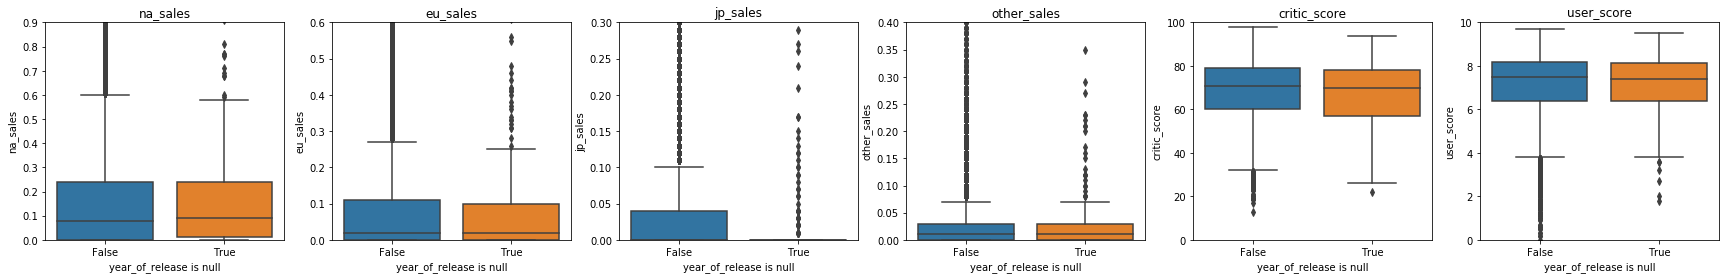

Some statistics for Percent of missing values for 'year_of_release' by categorical features:


feature,platform,genre,rating
min,0.00,0.77,0.00
positive_min,0.23,0.77,1.73
mean,1.17,1.57,0.91
median,0.23,1.72,0.86
max,12.78,2.04,1.90


Investigation of 'rating' missing values
Some statistics for numerical features for cases where 'rating' is null or not:


ratingis null                                        \
                       min positive_min    max       mean median   
na_sales      0.0           0.01         29.08  0.183424   0.00    
eu_sales      0.0           0.01         10.95  0.090671   0.00    
jp_sales      0.0           0.01         10.22  0.124472   0.02    
other_sales   0.0           0.01         2.74   0.022324   0.00    
critic_score  31.0          31.00        93.00  68.614458  70.00   
user_score    3.1           3.10         9.20   6.965116   7.35    

             ratingis not null                                        
                           min positive_min    max       mean median  
na_sales      0.0               0.01         41.36  0.317609   0.12   
eu_sales      0.0               0.01         28.96  0.182012   0.04   
jp_sales      0.0               0.01         6.50   0.045774   0.00   
other_sales   0.0               0.01         10.57  0.064352   0.02   
critic_score  13.0              13.00        98.00  68.971319  71.00  
user_score    0.0               0.20         9.70   7.126879   7.50

Distribution for numerical features for cases where 'rating' is null or not:


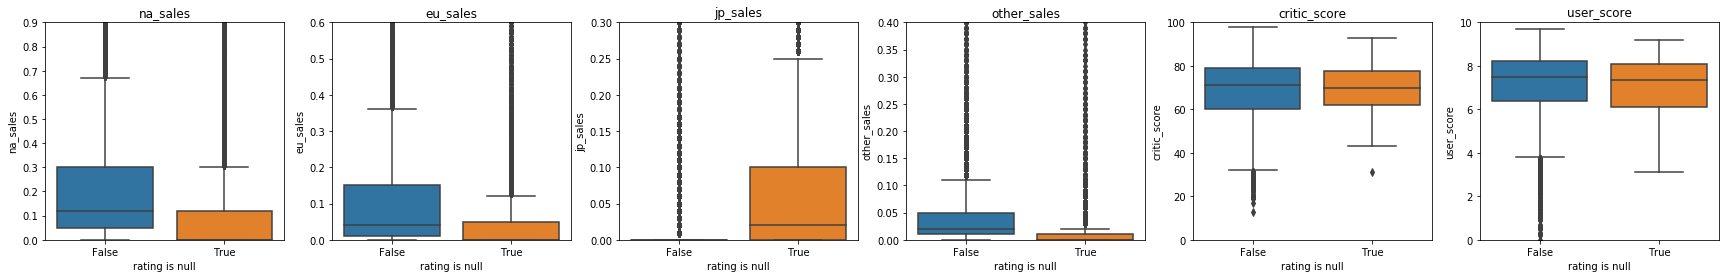

Some statistics for Percent of missing values for 'rating' by categorical features:


feature,platform,genre,year_of_release
min,11.04,22.98,20.90
positive_min,11.04,22.98,20.90
mean,65.97,41.51,68.80
median,73.08,38.48,91.56
max,100.00,65.77,100.00


The percent of 'rating' missing values by 'year_of_release':


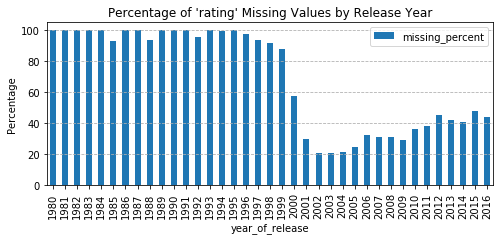

Investigation of 'critic_score' missing values
Some statistics for numerical features for cases where 'critic_score' is null or not:


critic_scoreis null                                       \
                            min positive_min    max      mean median   
na_sales     0.0                 0.01         29.08  0.178215  0.02    
eu_sales     0.0                 0.01         10.95  0.085017  0.00    
jp_sales     0.0                 0.01         10.22  0.099065  0.00    
other_sales  0.0                 0.01         2.74   0.023535  0.00    
user_score   0.0                 0.20         9.70   6.422339  7.00    

            critic_scoreis not null                                       
                                min positive_min    max      mean median  
na_sales     0.0                     0.01         41.36  0.352980  0.13   
eu_sales     0.0                     0.01         28.96  0.208311  0.05   
jp_sales     0.0                     0.01         6.50   0.055028  0.00   
other_sales  0.0                     0.01         10.57  0.072435  0.02   
user_score   0.5                     0.50         9.60   7.182428  7.50

Distribution for numerical features for cases where 'critic_score' is null or not:


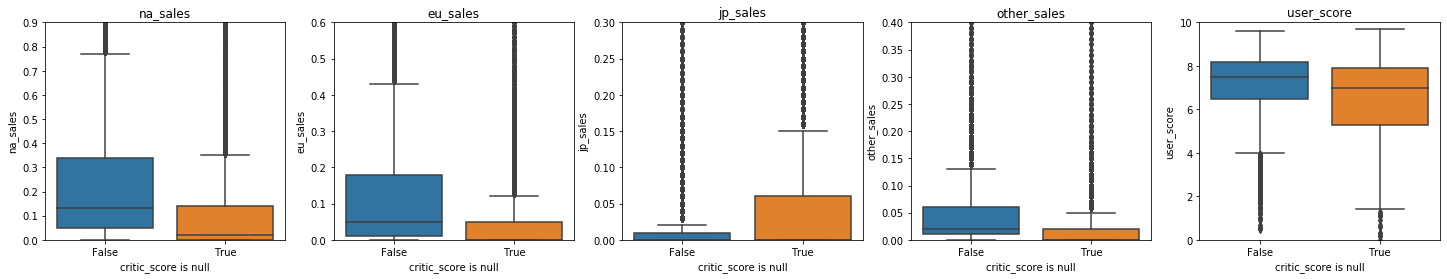

Some statistics for Percent of missing values for 'critic_score' by categorical features:


feature,platform,genre,year_of_release,rating
min,12.01,28.65,24.37,0.00
positive_min,12.01,28.65,24.37,5.12
mean,70.87,52.59,73.66,8.36
median,73.08,51.31,92.61,2.56
max,100.00,75.21,100.00,29.62


The percent of 'critic_score' missing values by 'year_of_release':


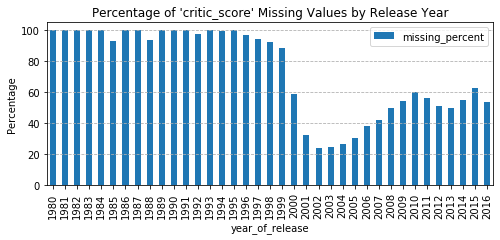

Investigation of 'user_score' missing values
Some statistics for numerical features for cases where 'user_score' is null or not:


user_scoreis null                                        \
                           min positive_min    max       mean median   
na_sales      0.0               0.01         29.08  0.169695   0.03    
eu_sales      0.0               0.01         10.95  0.078614   0.00    
jp_sales      0.0               0.01         10.22  0.093043   0.00    
other_sales   0.0               0.01         2.74   0.020682   0.00    
critic_score  23.0              23.00        90.00  60.934821  62.00   

             user_scoreis not null                                        
                               min positive_min    max       mean median  
na_sales      0.0                   0.01         41.36  0.375816   0.14   
eu_sales      0.0                   0.01         28.96  0.224893   0.06   
jp_sales      0.0                   0.01         6.50   0.059092   0.00   
other_sales   0.0                   0.01         10.57  0.079389   0.02   
critic_score  13.0                  13.00        98.00  70.249822  72.00

Distribution for numerical features for cases where 'user_score' is null or not:


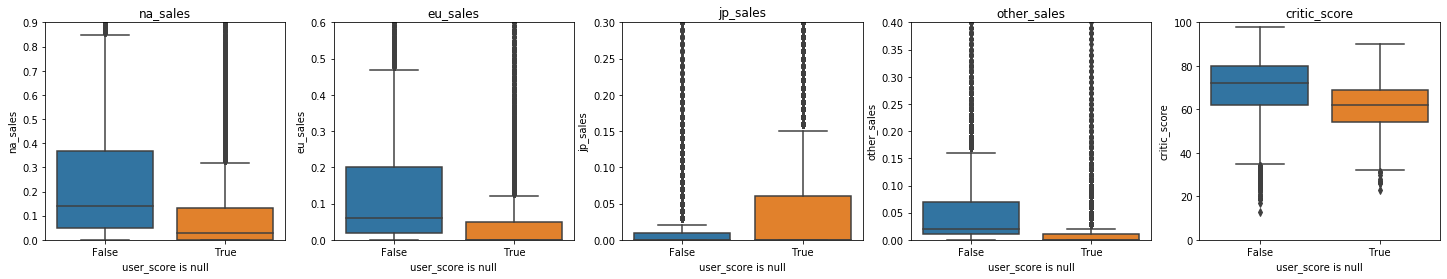

Some statistics for Percent of missing values for 'user_score' by categorical features:


feature,platform,genre,year_of_release,rating
min,20.94,30.16,33.42,0.00
positive_min,20.94,30.16,33.42,2.88
mean,72.18,56.47,75.13,10.43
median,76.01,53.01,91.82,1.44
max,100.00,77.93,100.00,40.48


The percent of 'user_score' missing values by 'year_of_release':


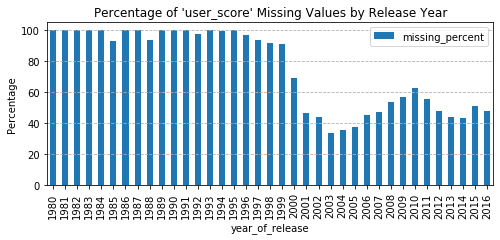

In [18]:
#function to calculate numerical features statistics when the values of the considered feature are missing and not
def num_feature_for_missing_values(data, features, null_feature):
    print("Some statistics for numerical features for cases where '" + null_feature + "' is null or not:")
    d = {}
    d[null_feature + 'is null'] = data[data[null_feature].isnull()][features]\
                                .agg(['min', positive_min, 'max', 'mean', 'median']).T
    pd.concat(d, axis=1)
    d[null_feature + 'is not null'] = data[data[null_feature].notnull()][features]\
                                .agg(['min', positive_min, 'max', 'mean', 'median']).T
    display(pd.concat(d, axis=1))
    
#function to plot boxplots for numerical features when the values of the considered feature are missing and not
def boxplots_missing_values_in_row(data, features, null_feature, ylims=None):
    cols_num = len(features)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(5*cols_num, 4))
    for i, feature in enumerate(features):
        sns.boxplot(y=feature, x='is_null', ax = axes[i],
                    data=data.dropna(subset=[feature]).assign(is_null = data[null_feature].isnull()));
        axes[i].set_title(feature)
        axes[i].set_xlabel(null_feature + ' is null')
        axes[i].set_ylim(ylims[i])
        
#function to calculate statistics for percent of missing values by categorical features
def missing_value_share_by_features(features, null_feature):
    null_share_dict = {'feature':[], 'min':[], 'positive_min':[], 'mean':[], 'median':[], 'max':[]}
    for feature in features:
        if feature == 'rating':
            shares = (games_data[games_data.rating.isin(['E', 'E10+', 'M', 'T'])\
                                 &games_data[null_feature].isnull()][feature].value_counts()\
                          /games_data[feature].value_counts()*100).fillna(0)
        else:
            shares = (games_data[games_data[null_feature].isnull()][feature].value_counts()\
                          /games_data[feature].value_counts()*100).fillna(0)
        null_share_dict['feature'].append(feature)
        null_share_dict['min'].append(shares.min())
        null_share_dict['positive_min'].append(min([x for x in shares if x > 0], default=np.nan))
        null_share_dict['mean'].append(shares.mean())
        null_share_dict['median'].append(shares.median())
        null_share_dict['max'].append(shares.max())
    return round(pd.DataFrame(null_share_dict).set_index('feature'), 2)

#function to calculate the number and percent of misssing values by feature
def missing_value_by_feature(feature, null_feature):
    feature_counts = games_data.groupby(feature).agg({feature:['count']})
    null_counts = games_data[games_data[null_feature].isnull()].groupby(feature).agg({feature:['count']})  
    null_by_feature = round(null_counts / feature_counts * 100, 2)
    null_by_feature.columns = ['missing_percent']
    return null_by_feature

#function to plot percent of missing values by year of release
def plot_missing_percent_by_year(null_feature):
    print("The percent of '" + null_feature + "' missing values by 'year_of_release':")
    percent_by_years = missing_value_by_feature('year_of_release', null_feature)
    ax = percent_by_years.plot(kind='bar', figsize=(8, 3));
    ax.set_title("Percentage of '" + null_feature + "' Missing Values by Release Year");
    ax.set_ylabel('Percentage');
    ax.grid(axis='y', linestyle='--');

#function to show all investigations for feature with missing values
def null_info(num_features, num_lims, cat_features, null_feature):
    print(BOLD + "Investigation of '" + null_feature + "' missing values" + END)
    num_feature_for_missing_values(games_data, num_features, null_feature)
                                   
    print("Distribution for numerical features for cases where '" + null_feature + "' is null or not:")
    boxplots_missing_values_in_row(games_data, num_features, null_feature, num_lims)                                 
    plt.show()

    print("Some statistics for Percent of missing values for '" + null_feature + "' by categorical features:")
    display(missing_value_share_by_features(cat_features, null_feature).T)
    
    if null_feature != 'year_of_release':
        plot_missing_percent_by_year(null_feature)
        plt.show()

#creating lists of numerical and categorical features
cat_features = ['platform', 'year_of_release', 'genre', 'rating']
num_features_lims_dic = {'na_sales': (0, 0.9), 'eu_sales': (0, 0.6), 'jp_sales': (0, 0.3),
                    'other_sales': (0, 0.4), 'critic_score': (0, 100), 'user_score': (0, 10)} 

#Let's look at categorical features with missing values
for cat_null in ['year_of_release', 'rating']:
    cat_features.remove(cat_null)
    null_info(num_features_lims_dic.keys(), list(num_features_lims_dic.values()),
              cat_features, cat_null)
    cat_features.append(cat_null)

#Let's look at numerical features with missing values
for num_null in ['critic_score', 'user_score']:
    lims = num_features_lims_dic.pop(num_null)
    null_info(num_features_lims_dic.keys(), list(num_features_lims_dic.values()),
              cat_features, num_null)
    num_features_lims_dic[num_null] = lims

There is no dependence of the appearance of unknown value of the year of released on the values of other features: the average values (see median) of numerical features do not differ, their interquartile ranges overlap strongly, and the missing values are evenly distributed among the values of categorical features.

For games with a missing ESRB rating, sales in all markets except Japanese are lower in average (see medians and corresponding boxplots). For the Japanese market, sales for non-rated games, on the other hand, are higher on average. For some platforms, perhaps not the most popular or fresh, the rating is completely absent. For all platforms, at least 10% of games have no ratings. More than 20% of ratings are missing in every genre. At least 20% of ratings are missing for each release year. Ratings are almost completely absent for games released before 2000.

For games with a missing ctitic score, sales in all markets except Japanese are also lower in average. For some platforms the critic scores are also completely absent. For all platforms, at least 12% of games have no critic scores. Almost 25% of scores are missing in every genre. For most of genres there are critic score only for half of released games. The ctitic scores are almost completely absent for games released before 2000. There are 75% critic scores for games with release years from 2001 to 2005. After that, only half of the released games has scores.

For games with a missing user score, sales in all markets except Japanese are lower in average and critic scores are also lower in average. For some platforms the users scores are almost completely absent. For all platforms, at least 20% of games have no user scores. 30% of scores are missing in every genre. For most of genres there are user score only for half of released games. The user scores are almost completely absent for games released before 2000. After there are scores only for half of released games.

The difference in sales for the missing ratings and scores may be related to the growth of the market as a whole, and the missing values are mostly consistent with earlier releases. It is necessary to look at more recent data.

Let us look at the data after year 2000.

Values of 'rating' are missing after 2000:
Some statistics for numerical features for cases where 'rating' is null or not:


ratingis null                                       \
                      min positive_min    max      mean median   
na_sales     0.0           0.01         9.05   0.097005  0.00    
eu_sales     0.0           0.01         10.95  0.070271  0.00    
jp_sales     0.0           0.01         6.04   0.079433  0.02    
other_sales  0.0           0.01         2.74   0.021531  0.00    

            ratingis not null                                       
                          min positive_min    max      mean median  
na_sales     0.0               0.01         41.36  0.314073  0.12   
eu_sales     0.0               0.01         28.96  0.179636  0.04   
jp_sales     0.0               0.01         6.50   0.042802  0.00   
other_sales  0.0               0.01         10.57  0.064881  0.02

Distribution for numerical features for cases where 'rating' is null or not:


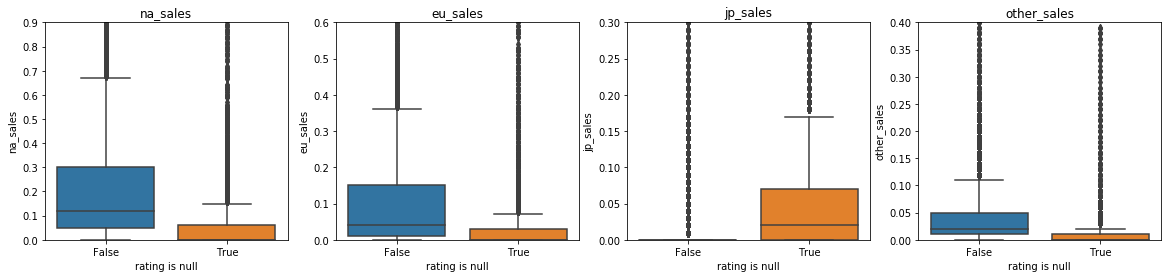

Values of 'critic_score' are missing after 2000:
Some statistics for numerical features for cases where 'critic_score' is null or not:


critic_scoreis null                                       \
                            min positive_min    max      mean median   
na_sales     0.0                 0.01         9.05   0.113689  0.01    
eu_sales     0.0                 0.01         10.95  0.068657  0.00    
jp_sales     0.0                 0.01         6.04   0.058780  0.00    
other_sales  0.0                 0.01         2.74   0.023487  0.00    

            critic_scoreis not null                                       
                                min positive_min    max      mean median  
na_sales     0.0                     0.01         41.36  0.349978  0.13   
eu_sales     0.0                     0.01         28.96  0.205976  0.05   
jp_sales     0.0                     0.01         6.50   0.051429  0.00   
other_sales  0.0                     0.01         10.57  0.073184  0.02

Distribution for numerical features for cases where 'critic_score' is null or not:


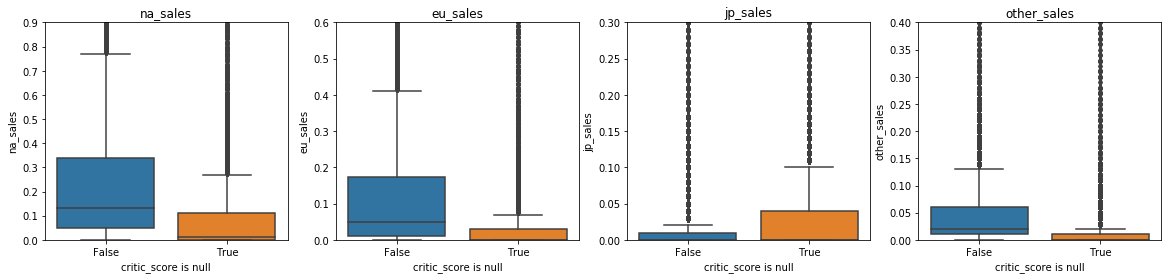

Values of 'user_score' are missing after 2000:
Some statistics for numerical features for cases where 'user_score' is null or not:


user_scoreis null                                       \
                          min positive_min    max      mean median   
na_sales     0.0               0.01         9.05   0.106704  0.02    
eu_sales     0.0               0.01         10.95  0.060703  0.00    
jp_sales     0.0               0.01         6.04   0.054399  0.00    
other_sales  0.0               0.01         2.74   0.019628  0.00    

            user_scoreis not null                                       
                              min positive_min    max      mean median  
na_sales     0.0                   0.01         41.36  0.372185  0.14   
eu_sales     0.0                   0.01         28.96  0.222558  0.05   
jp_sales     0.0                   0.01         6.50   0.055078  0.00   
other_sales  0.0                   0.01         10.57  0.080110  0.02

Distribution for numerical features for cases where 'user_score' is null or not:


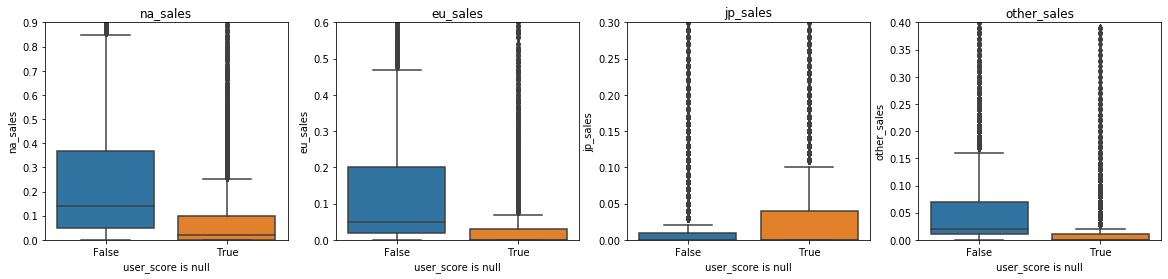

In [19]:
sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for feature in ['rating', 'critic_score', 'user_score']:
    print(BOLD + "Values of '" + feature + "' are missing after 2000:" + END)
    num_feature_for_missing_values(games_data[games_data.year_of_release>2000], sales, feature)
    print("Distribution for numerical features for cases where '" + feature + "' is null or not:")
    boxplots_missing_values_in_row(games_data[games_data.year_of_release>2000], sales, feature,
                                   [num_features_lims_dic[s] for s in sales])
    plt.show()

On data after 2000 the sales in all markets except Japanese are also lower in average for games with missing ESRB ratings or scores. In Japan, apparently they do not look at ratings and scores, or do not know about them.

We may also have a look if there is a year in the name of the game for the missing 'year_of_release'.

In [20]:
names_with_digit = games_data[(games_data.year_of_release.isnull())\
                                  &games_data.name.str.findall(' \d{2}').str[0].notnull()][['name']]
print(BOLD + "There are {} games with digits in the name for the missing 'year_of_release'. "\
                  .format(len(names_with_digit)) + END)
print('Some of them: ')
display(names_with_digit.head(10))

print(BOLD + 'Some of these games have a release year filled for other platforms:' + END)
names_with_digits_exist_year = games_data.query('name in @names_with_digit.name and year_of_release>0', engine = 'python')\
    [['name', 'year_of_release']].drop_duplicates()
display(names_with_digits_exist_year)

print(BOLD + 'For other games, numbers are cut from the name:' + END)
rest_names_with_digit = (set(names_with_digit.name)-set(names_with_digits_exist_year.name))
rest_names_with_digit = pd.DataFrame({'name': list(rest_names_with_digit),
              'year_of_release': [int(''.join(filter(str.isdigit, name))) for name in rest_names_with_digit]})
display(rest_names_with_digit)

There are 25 games with digits in the name for the missing 'year_of_release'. 
Some of them: 


,name
183,Madden NFL 2004
377,FIFA Soccer 2004
475,wwe Smackdown vs. Raw 2006
1301,Triple Play 99
1650,NASCAR Thunder 2003
2479,Madden NFL 07
2492,MLB SlugFest 20-03
2572,PES 2009: Pro Evolution Soccer
2849,Madden NFL 11
3413,Madden NFL 06


Some of these games have a release year filled for other platforms:


,name,year_of_release
213,Madden NFL 06,2005
241,Madden NFL 07,2006
452,Madden NFL 2002,2001
561,Madden NFL 11,2010
617,PES 2009: Pro Evolution Soccer,2008
1104,NBA Live 2003,2002
1881,Madden NFL 2004,2003
2606,FIFA Soccer 2004,2003
2834,Tiger Woods PGA Tour 07,2006
4329,PES 2009: Pro Evolution Soccer,2009


For other games, numbers are cut from the name:


,name,year_of_release
0,Triple Play 99,99
1,Indy 500,500
2,NFL GameDay 2003,2003
3,Tour de France 2011,2011
4,Famista 64,64
5,All-Star Baseball 2005,2005
6,wwe Smackdown vs. Raw 2006,2006
7,Football Manager 2007,2007
8,Sega Rally 2006,2006
9,Drake of the 99 Dragons,99


For a small number of games, we can restore the missed year of release by the name of the game. Note that some of these games have a release year for other platforms. Moreover, sometimes the name contains the next year after the year of release. We can use this data and fill in the missing values. For the rest of the missing years of release, we will extract value from the name, removing games containing numbers that do not correspond to the year, such as 'Drake of the 99 Dragons' or 'Indy 500'.

In [21]:
#filling in 'year_of_release' by other platforms for game names with year 
names_exist_year_dict = names_with_digits_exist_year.set_index('name')['year_of_release'].to_dict()
games_data.year_of_release.fillna(games_data.name.map(names_exist_year_dict), inplace=True)
#filling in 'year_of_release' by extracted year from game names 
rest_names_with_digit_dict = rest_names_with_digit.query('year_of_release>2000')\
    .set_index('name')['year_of_release'].to_dict()
games_data.year_of_release.fillna(games_data.name.map(rest_names_with_digit_dict), inplace=True)

print("The missing 'year_of_release' for {} games are filled."\
          .format(269-games_data.year_of_release.isnull().sum()))

The missing 'year_of_release' for 21 games are filled.


Let us look at how many games we have remaining without *'year_of_release'*.

In [22]:
print('Number of games still with no year of release:', games_data.year_of_release.isnull().sum())
print('Percentage: {:.1%}'.format(games_data.year_of_release.isnull().sum()/len(games_data)))

Number of games still with no year of release: 248
Percentage: 1.5%


Since the missing data here is only 1.5\% of the total data, we can drop these rows with no significant impact to the data.

In [23]:
games_data = games_data.drop(games_data[games_data['year_of_release'].isnull()].index)

In [24]:
print('Number of games still with no year of release:', games_data.year_of_release.isnull().sum())

Number of games still with no year of release: 0


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
You did a great job processing missing value. Here we can just replace missing values just with some constant numerical value, as .mean() or any other replaecment can once again lead to some incorect interpretation of data (for example if critic score is much lower on a specific platform like Cyberpunk on PS4).
    
    games[games['critic_score'] == 'tbd'] = float('nan')


### Processing Duplicates

Let us check for duplicates.

In [25]:
games_data[games_data.duplicated(['name', 'platform', 'year_of_release'], keep=False)].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,is_tbd_score
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E,False
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E,False


There is one duplicate game in the dataset (the name, release year and platform are the same), but with different sales in the European market. Note that the ratings and scores of critics and users are the same as well. We can add up the sales for this game and leave only one line for the game.

We can append a row with the sum of *'eu_sales'* and then drop the duplicate.

In [26]:
games_data = games_data.append(games_data[games_data.duplicated(['name', 'platform', 'year_of_release'], keep=False)]\
                                  .groupby(['name','platform', 'year_of_release'])\
                                      .agg({'genre':'first', 'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum',
                                            'other_sales':'sum', 'critic_score':'first', 'user_score':'first',
                                            'rating':'first', 'is_tbd_score':'first'}).reset_index())

Calling append for old version of pandas leads to changing the *'year_of_release'* type. We need to check this and change it back to int16 again or update pandas.

In [27]:
games_data['year_of_release'].dtypes

Int64Dtype()

In [28]:
games_data['year_of_release'] = games_data.year_of_release.astype('Int16')

#dropping duplicates except for the last added row 
games_data.drop_duplicates(['name', 'platform', 'year_of_release'], keep='last', inplace=True)
games_data.reset_index(inplace=True, drop=True)

### Additional Calculations

We calculate the total sales for each game.

In [29]:
games_data['total_sales'] = games_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

The *'total_sales'* feature have been calculated, which are necessary for further analysis.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great, everything is correct here. 


### Investigating Outliers

Let us look at the games with huge sales.

In [30]:
#function to calculate Q3+1.5IQR value
def outliers_border(series):
    Q1 = series.quantile(0.25) 
    Q3 = series.quantile(0.75) 
    IQR = Q3 - Q1 
    return Q3 + 1.5 * IQR

#function to calculate the percentsge of outliers
def perc_outliers(series):
    border = outliers_border(series)
    return sum(value > border for value in series) * 100 / len(series)

print(BOLD + 'Some statistic to determine the limits of outliers:' + END)
games_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']]\
    .agg(['min', 'max', 'mean', 'median', outliers_border, perc_outliers]).T

Some statistic to determine the limits of outliers:


,min,max,mean,median,outliers_border,perc_outliers
na_sales,0.0,41.36,0.264387,0.08,0.600,10.137269
eu_sales,0.0,28.96,0.146072,0.02,0.275,12.384597
jp_sales,0.0,10.22,0.078414,0.00,0.100,14.680515
other_sales,0.0,10.57,0.047680,0.01,0.075,13.496113
total_sales,0.0,82.54,0.536553,0.17,1.085,11.376336


The upper whiskers of market sales boxplots (the approximate border of the "typical" range) end much far from the maximum sales. We can set these values as borders for bestsellers to take into account them separatly in further analysis.

We should also all flag features, whether sales are huge or not for each market.

In [31]:
sales = sales + ['total_sales']
for sale in sales:
    border = outliers_border(games_data[sale])
    games_data['huge_'+sale] = games_data[sale] > border

print(BOLD + 'Several rows of the dataset after adding new features:' + END)
display(games_data[['name', 'platform', 'year_of_release'] + sales + ['huge_'+s for s in sales]].sample(5))

Several rows of the dataset after adding new features:


,name,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales,huge_na_sales,huge_eu_sales,huge_jp_sales,huge_other_sales,huge_total_sales
3388,Final Fantasy Anniversary Edition,PSP,2007,0.39,0.02,0.13,0.04,0.58,False,False,True,False,False
13781,Suzumiya Haruhi no Tsuisou,PSP,2011,0.00,0.00,0.04,0.00,0.04,False,False,False,False,False
6622,Netsu Chu! Pro Yakyuu 2002,PS2,2002,0.00,0.00,0.25,0.00,0.25,False,False,True,False,False
4311,Dead or Alive: Dimensions,3DS,2011,0.13,0.21,0.07,0.03,0.44,False,False,False,False,False
7400,Assassin's Creed The Ezio Collection,PS4,2016,0.04,0.13,0.00,0.03,0.20,False,False,False,False,False


We are going to look at distribution of sales for bestsellers by release years.

Distribution of total sales for bestsellers by release years:


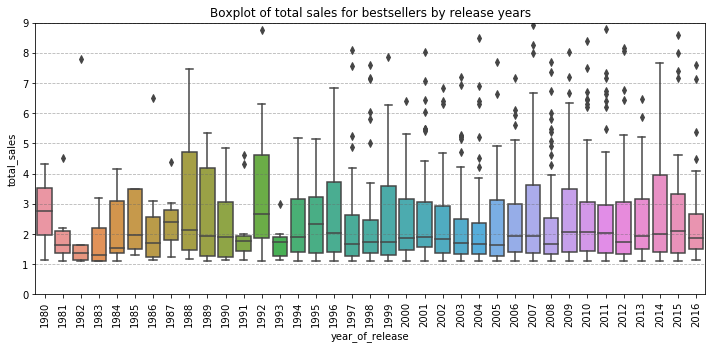

Persentage of bestsellers by release years:


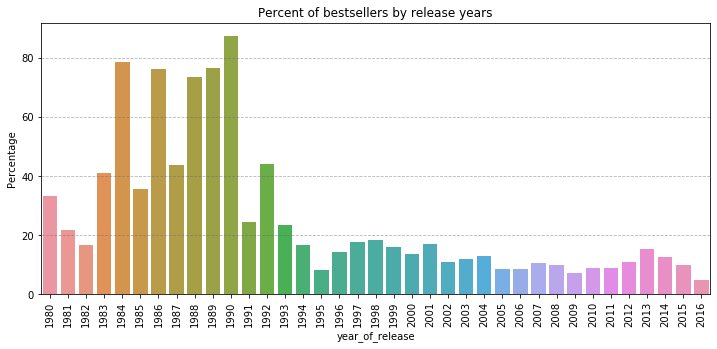

In [32]:
print(BOLD + 'Distribution of total sales for bestsellers by release years:' + END)
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x='year_of_release', y='total_sales', data=games_data[games_data.huge_total_sales==True], ax=ax,
            order = pd.Series(sorted(games_data.year_of_release.dropna().unique())));
ax.set_ylim(0, 9);
ax.xaxis.set_tick_params(rotation=90)
ax.set_title('Boxplot of total sales for bestsellers by release years')
ax.grid(axis='y', linestyle='--', color='dimgray', alpha=0.5)
plt.show()

print(BOLD + 'Persentage of bestsellers by release years:' + END)
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='year_of_release', y='huge_total_sales', ax=ax,\
            data=(games_data.groupby('year_of_release').huge_total_sales.sum()\
                      /games_data.groupby('year_of_release').huge_total_sales.count()*100).reset_index());
ax.xaxis.set_tick_params(rotation=90)
ax.set_title('Percent of bestsellers by release years')
ax.set_ylabel('Percentage');
ax.grid(axis='y', linestyle='--', color='dimgray', alpha=0.5)

The distribution of sales for games with different release years is very different, but in the last 8 years it is very similar and the average sales of bestsellers at this time are $ 2 mln.

The dataset has a large percentage of huge sales for games from 1983 to 1992. After 2005, the percentage of bestsellers is about 10\%, with the exception of 2013, where there are slightly more of them.

### Conclusion

To prepare the data for further analysis, the following steps were taken:

- 1. Feature names have been converted to lowercase for more convenient work with them
- 2. The necessary type conversions have been made. Additionally, the 'tbd' value of 'user_score' feature was replaced with NaN after saving info about 'tbd' score in an aditional column.
- 3. Two not actual games (released in 1993) with unknown name have been removed.
- 4. The missed 'year_of_release' for 21 games has been restored from the game names containing them. The remaining 248 missing release years, which is 1.5% of the data, are difficult to restore from the available data, and hence were dropped.
- 5. Other missing values were examed. There are 40% missing ESRB ratings and about 50% critic and user scores (they almost completely absent for games released before 2000), which cannot be restored from the rest of the feature values, since e.g. the rating and scores are not the same for different platforms for the same game. Missing ratings and scores are not always in the same lines, but generally, there are no critical scores for games that are not rated, and there are no user scores for games that have not critics scores. If consider missing ratings and scores as absent data, the sales in all markets except Japanese are lower in average for games with missing ESRB ratings or scores and games with lower critical scores are less likely to be rated by users.
- 6. There is one duplicate game in the dataset (the name, release year and platform are the same) and we removed duplicate row.
- 7. Additionally, for further analysis, the total sales over all markets was calculated.
- 8. There are games with huge sales of 10% to 15% for each market. To mark these besselers, the corresponding boolean features have been added for different market. For the latest data, sales of bestsellers are evenly distributed over the years. This means that we can consider bestsellers together with typical representatives of games.

## 3. Exploratory Data Analysis

### Number of games released in different years

We need to look at how many games were released in different years, and also how many platforms existed in different years.

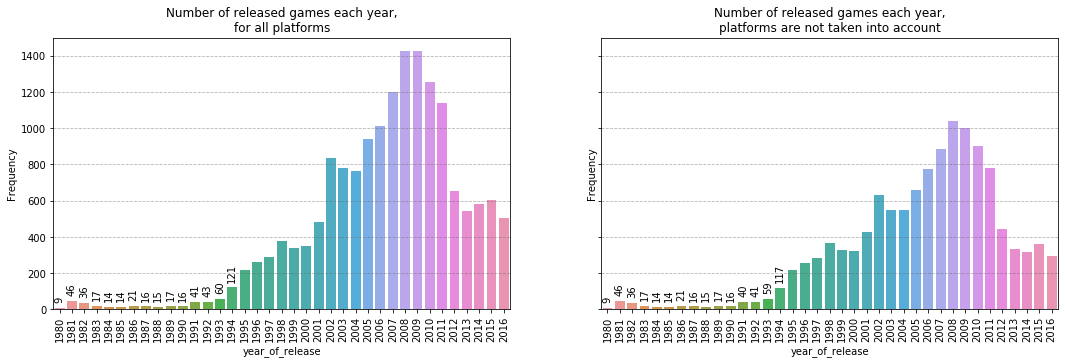

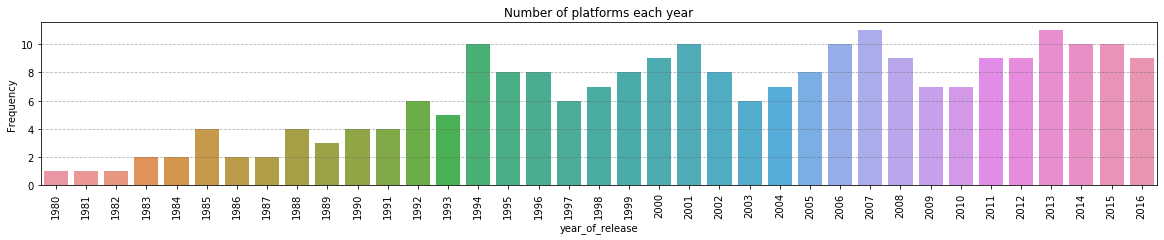

In [33]:
def samples_barplot_in_row(samples, descriptions):
    cols_num=len(samples)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(9*cols_num, 5), sharey=True)
    for i, (data, descr) in enumerate(zip(samples, descriptions)):
        sns.barplot(x='year_of_release', y='name', ax=axes[i], data=data);
        axes[i].set_title('Number of released games each year' + descr);
        axes[i].set_ylabel('Frequency');
        #adding labels for not significant numbers of games 
        rects = axes[i].patches
        labels = [str(v) for v in data.name if v<200]
        for rect, label in zip(rects[:len(labels)], labels):
            height = rect.get_height()
            axes[i].text(rect.get_x() + rect.get_width() / 2, height + 30, label,
                    ha='center', va='bottom', rotation=90)
        axes[i].set_xticklabels(data.year_of_release.values);
        axes[i].xaxis.set_tick_params(rotation=90);
        axes[i].grid(axis='y', linestyle='--', color='dimgray', alpha=0.5)

samples_barplot_in_row([games_data.groupby('year_of_release').name.agg('count').reset_index(),
                        games_data[['name', 'year_of_release']].drop_duplicates()\
                            .groupby('year_of_release').name.agg('count').reset_index()],
                       [',\nfor all platforms', ',\nplatforms are not taken into account'])


fig, ax = plt.subplots(figsize=(20, 3));
sns.barplot(x='year_of_release', y='platform', ax=ax,
            data=games_data.groupby(['year_of_release']).platform.nunique().reset_index());
ax.set_title('Number of platforms each year');
ax.set_ylabel('Frequency');
ax.grid(axis='y', linestyle='--', color='dimgray', alpha=0.5)
ax.xaxis.set_tick_params(rotation=90);

In the first graph (left) we consider the game released on different platforms as different games, in the second graph (right) platforms are not taken into account. Until 2008, the number of games released increases significantly. Moreover, until 2000, games were released for each platform different (the number of games for both graph are the same), after that the same game was released for several platforms at once, which looks like an explosive growth in the number of games (see the 1st graph). After 2012, the number of games released has dropped sharply and has not changed significantly afterwards, although the number of existing platforms has not changed significantly. Until 1995, the number of games was not significant.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Yes, looks like there were almost no games before 1995.

</div>

### Platforms: Sales and Lifetime

We now look at number of games and the total sales for each platform.

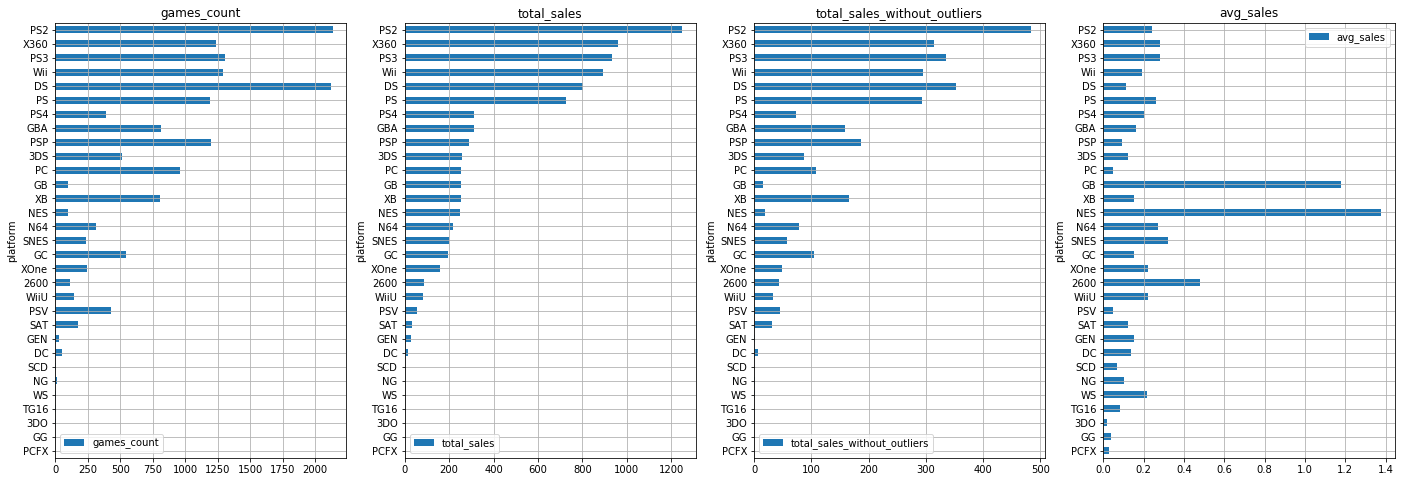

In [34]:
#function to calculated pivot table for platforms
def get_platform_sales(data):
    platform_sales = data.pivot_table(index='platform', values='total_sales', aggfunc=['count', 'sum', 'median'])
    platform_sales.columns = ['games_count', 'total_sales', 'avg_sales'] 
    return platform_sales

#function to plot several barplot in one line
def barplot_in_row(data, features):
    cols_num=len(features)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(6*cols_num, 8))
    for i, feature in enumerate(features):
        data.plot.barh(y=feature, ax=axes[i], grid=True)
        axes[i].set_title(feature)

#calculating pivot table for platforms        
platform_sales = get_platform_sales(games_data)
platform_sales_without_outliers = get_platform_sales(games_data[games_data.huge_total_sales==False])
platform_sales['total_sales_without_outliers'] = platform_sales_without_outliers.total_sales

#plotting number of games and the total sales for each platform
barplot_in_row(platform_sales.sort_values('total_sales'), 
               ['games_count', 'total_sales', 'total_sales_without_outliers', 'avg_sales'])

In terms of total sales, the PlayStation 2 is the absolute leader, even if we exclude the bestsellers with huge sales (see graph for total sales without outliers). This console has the largest number of games released, as well as the Nintendo DS, but for a portable console the average price of a game is lower. Note that the median is considered as the average sales due to the presence of outliers. The leaders in terms of sales and the number of released games also include 2 more versions of PlayStation: PS and PS3, and the Xbox 360 and the Nintendo Wii. The latest versions of these consoles: the PlayStation4, the Xbox One and the Nintendo Wii U lag far behind in total sales and the number of games released for them. Note that the total sales include all sales from the moment the game was released until the current moment, respectively, this explains the fact that consoles that have appeared relatively recently (with smaller lifetime) are lagging behind.

Let's see how bestselling games affect total sales in an example of the Nintendo Entertainment System (NES) and the Game Boy (GB). Their average sales are quite high, but if we exclude these outliers, then the total sales of other games will be significantly lower.

And now we also look at the lifetime of the platforms.

Lifetime of platforms:


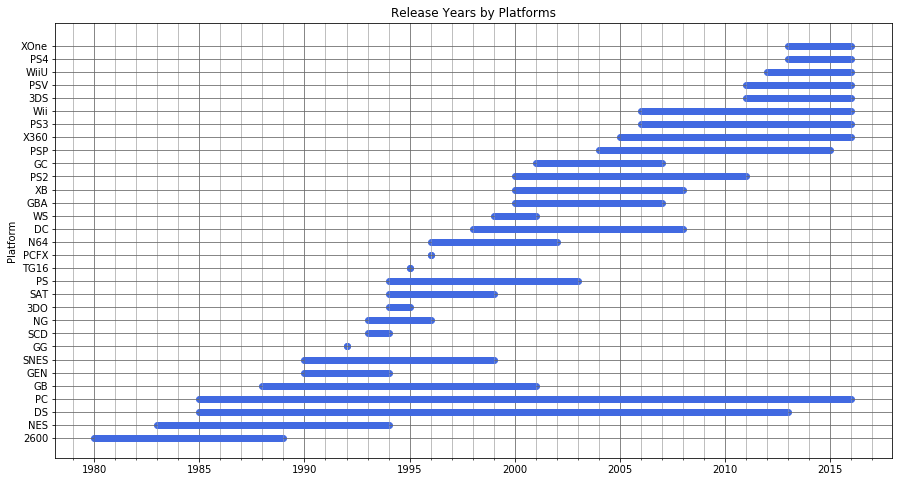

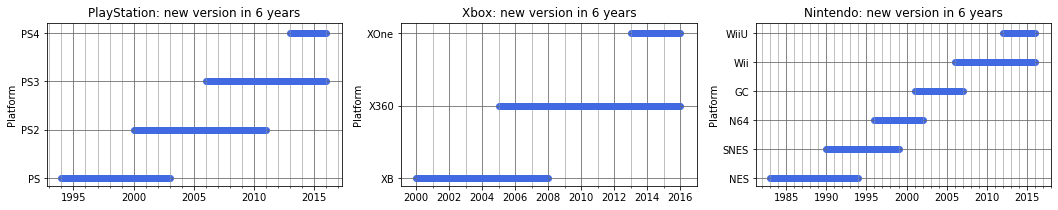

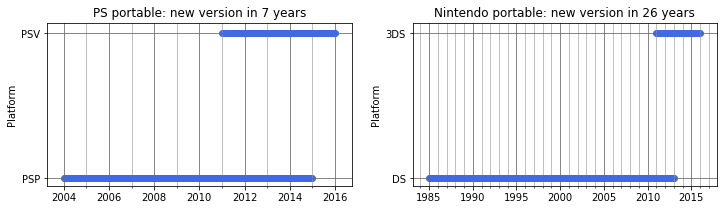

Histogram for a lifetime for a platform:


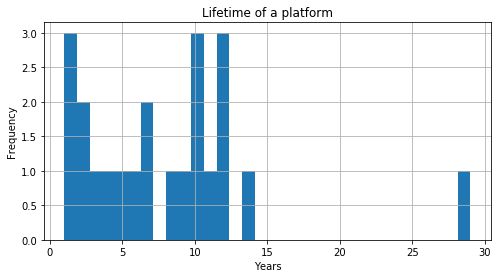

Average lifetime of a platform is 7.5 years


In [35]:
platform_lifetime = games_data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
platform_lifetime.columns = ['min_date', 'max_date'] 
platform_lifetime.sort_values(['min_date', 'max_date'], inplace=True)

#function to plot lifetime for platforms
def plot_lifetime(data, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 8))
    for i in range(len(data)):
        ax.hlines(data.index[i], xmin=data.iloc[i].values[0], xmax=data.iloc[i].values[1],
                  linewidth=7.0, color='royalblue');
        ax.scatter(x=data.iloc[i,:], y=[data.index[i]]*2, color='royalblue')
        ax.grid(color='dimgray')
        xticks = ax.get_xticks()
        ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(xticks[1]-xticks[0]))
        ax.grid(b=True, which='minor')
        ax.set_ylabel('Platform')
        ax.set_title('Release Years by Platforms')

print(BOLD + 'Lifetime of platforms:'  + END)
plot_lifetime(platform_lifetime)
plt.show()

#dictionary for names of consoles and their versions
console_series = {'PlayStation': ['PS', 'PS2', 'PS3', 'PS4'],
                  'PS portable': ['PSP', 'PSV'],
                  'Xbox': ['XB', 'X360', 'XOne'],
                  'Nintendo': ['NES', 'SNES', 'N64', 'GC', 'Wii', 'WiiU'],
                  'Nintendo portable': ['DS', '3DS']}

#function to calculate time after which a new version of a platform appears
def new_platform_take(platforms):
    years_before_new = []
    for i in range(len(platforms)-1):
        years_before_new.append(platform_lifetime.loc[platforms[i+1], 'min_date']\
                                   - platform_lifetime.loc[platforms[i], 'min_date'])
    return years_before_new

#function to plot lifetime for different versions of consoles
def plot_lifetime_in_row(console_names):
    cols_num=len(console_names)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(6*cols_num, 3))
    for i, name in enumerate(console_names):
        plot_lifetime(platform_lifetime[platform_lifetime.index.isin(console_series[name])], ax=axes[i])
        new_platform_appearence = round(np.mean(new_platform_take(console_series[name])))
        axes[i].set_title(name + ': new version in ' + str(new_platform_appearence) + ' years')
    plt.show()

#ploting lifetime for different versions of consoles
plot_lifetime_in_row(['PlayStation', 'Xbox', 'Nintendo'])
plot_lifetime_in_row(['PS portable', 'Nintendo portable'])

#calculating a lifetime for each platform
platform_lifetime['lifetime'] = platform_lifetime.max_date - platform_lifetime.min_date + 1

#we do not take into account the platforms that are still on the market, because their lifetime is not over yet
print(BOLD + 'Histogram for a lifetime for a platform:'  + END)
ax = platform_lifetime[platform_lifetime.max_date!=2016].lifetime.hist(bins=32, figsize=(8, 4));
ax.set_title('Lifetime of a platform');
ax.set_xlabel('Years');
ax.set_ylabel('Frequency');
plt.show()

print(BOLD + 'Average lifetime of a platform is {} years'\
                  .format(platform_lifetime[platform_lifetime.max_date!=2016].lifetime.median()) + END)

There are platforms that have only been around for one year, and there are the Nintendo DS that have been around for 29 years. The personal computer has been used for games since 1985. On average, platforms exist for 7.5 years, after which new games are no longer released for it. The new version of the console comes out in 6-8 years, the new version for the Nintendo DS came out only 26 years later. We should not bet on platforms that have existed for more than 6 years, as a new version of the console may appear soon and new games will cease to be released.

For 2016, there are simultaneously the current and previous versions of the PlayStation, the Xbox and the Nintendo Wii. It makes sense to predict only for actual platforms.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
That is also correct to check platform life cycle.


Let us also look at distribution of number of games and sales for actual platforms by years.

In [36]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16464 entries, 0 to 16463
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16464 non-null  object 
 1   platform          16464 non-null  object 
 2   year_of_release   16464 non-null  Int16  
 3   genre             16464 non-null  object 
 4   na_sales          16464 non-null  float64
 5   eu_sales          16464 non-null  float64
 6   jp_sales          16464 non-null  float64
 7   other_sales       16464 non-null  float64
 8   critic_score      7998 non-null   Int8   
 9   user_score        7476 non-null   float64
 10  rating            9782 non-null   object 
 11  is_tbd_score      16464 non-null  bool   
 12  total_sales       16464 non-null  float64
 13  huge_na_sales     16464 non-null  bool   
 14  huge_eu_sales     16464 non-null  bool   
 15  huge_jp_sales     16464 non-null  bool   
 16  huge_other_sales  16464 non-null  bool  

Histograms of number of games by release year for each actual platform:


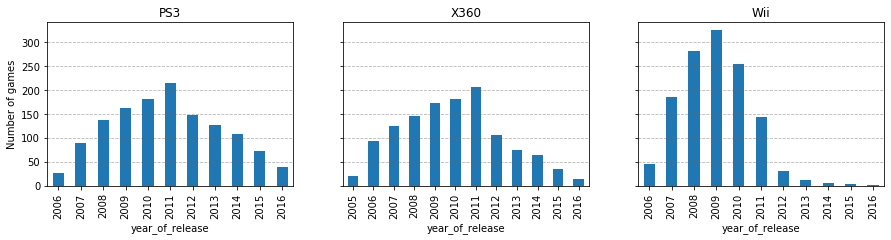

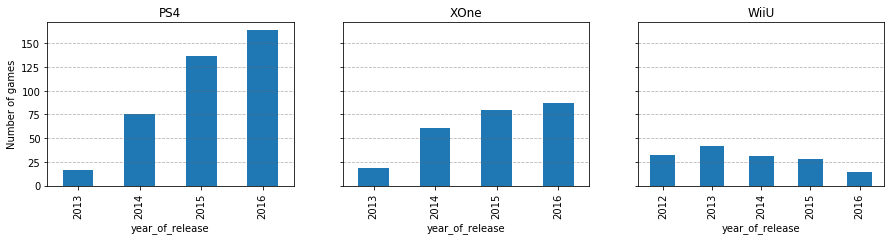

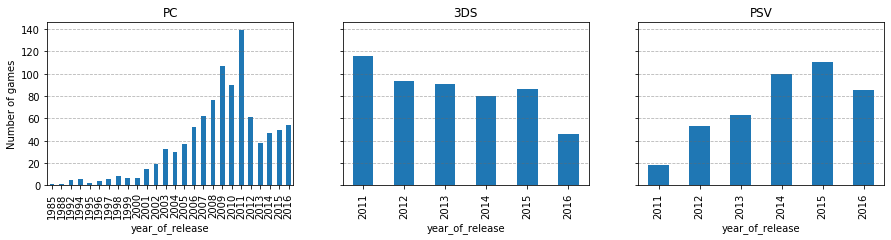

Boxblots of total sales of games (without bestsellers) by release year:
Rem: Eliminate the bessellers to look at the distribution of sales for the average game


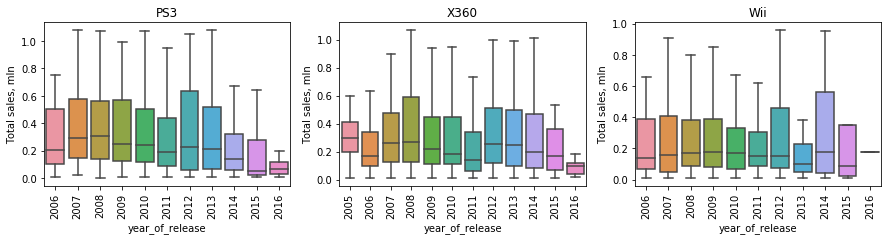

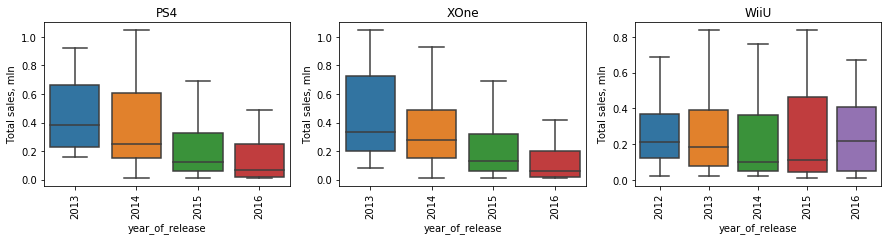

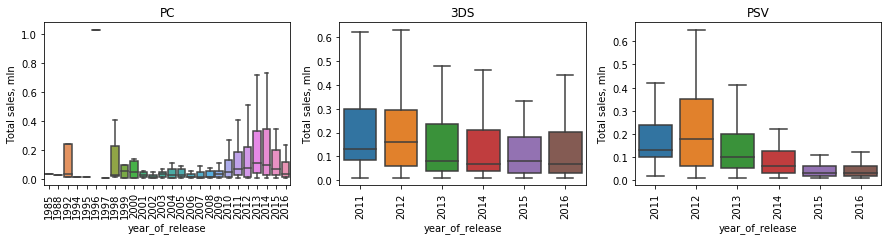

In [37]:
actual_platforms = {'old versions': ['PS3', 'X360', 'Wii'],
                    'new versions': ['PS4', 'XOne', 'WiiU'],
                    'PC and portable': ['PC', '3DS', 'PSV']}

#function to plot histograms of features by years in one line
def hist_platform_info_by_years_in_row(data, platforms, func, ylabel, sharey=True):
    cols_num=len(platforms)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(5*cols_num, 3), sharey=sharey)
    for i, platform_name in enumerate(platforms):
        data[data.platform==platform_name].groupby('year_of_release')['total_sales'].agg(func)\
            .plot(kind='bar', ax=axes[i]);
        axes[i].set_title(platform_name)
        axes[i].set_ylabel(ylabel)
        axes[i].grid(axis='y', linestyle='--', color='dimgray', alpha=0.5)
    plt.show()

#function to plot boxplots of features by years in one line
def boxplot_platform_features_by_years_in_row(data, platforms, feature, ylabel, ylims=None):
    cols_num=len(platforms)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(5*cols_num, 3))
    for i, platform_name in enumerate(platforms):
        sns.boxplot(x='year_of_release', y=feature, data=data[data.platform==platform_name], ax=axes[i], showfliers = False)
        axes[i].set_ylim(ylims)
        axes[i].xaxis.set_tick_params(rotation=90)
        axes[i].set_title(platform_name)
        axes[i].set_ylabel(ylabel)
    plt.show()

#plotting of histograms of number of games by release year for each actual platform
print(BOLD + 'Histograms of number of games by release year for each actual platform:'  + END)
for name in actual_platforms.keys():
    hist_platform_info_by_years_in_row(games_data, actual_platforms[name], 'count', 'Number of games')

#plotting of boxplots of total sales of games by release year for each actual platform
print(BOLD + 'Boxblots of total sales of games (without bestsellers) by release year:'  + END)
print(BOLD + 'Rem: '+ END + 'Eliminate the bessellers to look at the distribution of sales for the average game')
for name in actual_platforms.keys():
    boxplot_platform_features_by_years_in_row(games_data[games_data.huge_total_sales!=True], 
                                              actual_platforms[name], 'total_sales', 'Total sales, mln')

Already before the release of the new version of the console, the number of games released begins to decline (see the histograms of the number of games for PS2, X360, Wii, the year of release of the new platform can be seen on the histograms for PS3, XOne and WiiU, respectively).

The distribution of games released for the PlayStation 2 and the Xbox 360 is approximately the same. For the Nintendo Wii, more games were released until 2011.

When new console the PlayStation 3, the Playstation 4, the Xbox 360, the Xbox One, or the PlayStation Vita (PSV) appeared, about 20 games were released for them and then the number of games grew. When a new version of the Nintendo 3DS appeared, more than 100 games were released for it, then the number of games released decreased slightly.

The number of games released for the PlayStation 3 since the inception of the platform has been growing all the time and by 2016 it is 2 times more than the number of games released for the Xbox One. For the Nintendo Wii U, only a couple of dozen games are released every year.

For the personal computer, the number of games released began to grow strongly in 2000 and ended its growth in 2011. After that, the number of games released dropped sharply to 40-50 games per year, which looks extremely unlikely. Perhaps the dataset has some kind of filters applied to the data.

Sales of games released in different years include a different number of games released, so the trend for the PC repeats the change in the number of games released, as well as the fact that the total sales include all sales from the moment the game was released to the current moment, so we see a downward trend in sales of the PlayStation 4 and the Xbox One.

Since sales are cumulative over the lifetime of the game, then to compare sales on several platforms, it is necessary to consider only the latest data and we can start from 2013, when the latest versions of the current platforms appeared, and then we will not compare their sales with the cumulative sales of games that have existed for longer.

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Great that you used only recent sales data and platform; however, I would suggest keeping only data after 2014 so that we will have only the latest platform generation (well not the latest anymore).
    

<div class="alert alert-info"> <b>Student comments: </b>
I see. Even though the initial release of PS4 and Xbox One was November 2013, it is better to consider the data from 2014 onwards. I will update the code and the discussion.
</div>

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
🙌

We will now have a look at number of games and the total sales for each actual platform from 2014 to 2016.

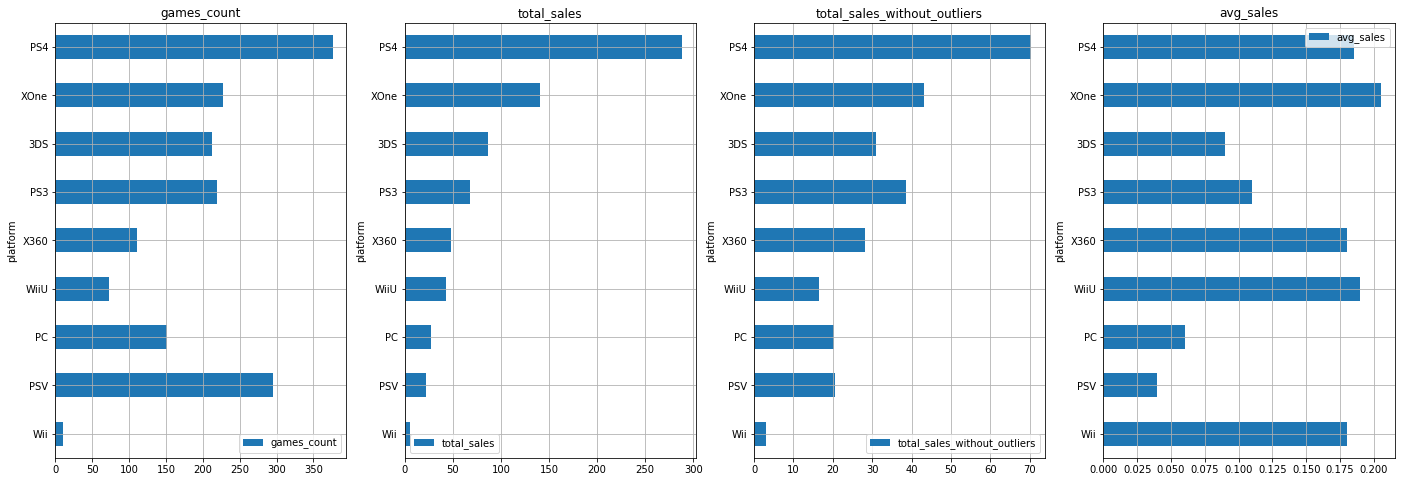

In [38]:
#getting the list of actual platforms
actual_platforms_list = platform_lifetime[platform_lifetime.max_date==2016].index

#calculating table of sales by platforms 
platform_sales_new = get_platform_sales(games_data[games_data.platform.isin(actual_platforms_list)\
                                                  &(games_data.year_of_release>2013)])
platform_sales_new_without_outliers = get_platform_sales(games_data[games_data.platform.isin(actual_platforms_list)\
                                                         &(games_data.year_of_release>2013)\
                                                         &(games_data.huge_total_sales==False)])
platform_sales_new['total_sales_without_outliers'] = platform_sales_new_without_outliers.total_sales

#plotting number of games and the total sales for each actual platform
barplot_in_row(platform_sales_new.sort_values('total_sales'),
               ['games_count', 'total_sales', 'total_sales_without_outliers', 'avg_sales'])

In terms of total sales, the PlayStation 4 is the leader. Bestsellers do make a big contribution, but even without them - sales for the PlayStation 4 still leads all the other platforms by a considerable margin. The total sales of the PlayStation 3, the Xbox One, the Nintendo 3DS and the Xbox 360 are comparable if you remove the bestellers. Though, with the bestsellers the PlayStation 3 takes the lead among them. Both versions of the Nintendo Wii, as well as the PC and the PlayStation Vita (PSV), are lagging far behind them, although a large number of games have been released for the PSV, the average sales are quite low. Note that the median is considered as the average sales due to the presence of outliers.

We should also have a look at dynamics of changes in sales over the last 4 years.

Boxblots of total sales for actual platforms by release year:


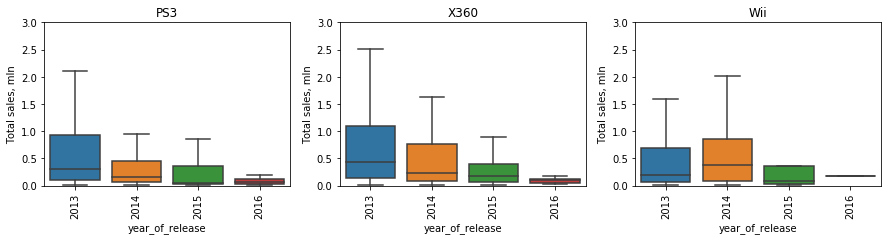

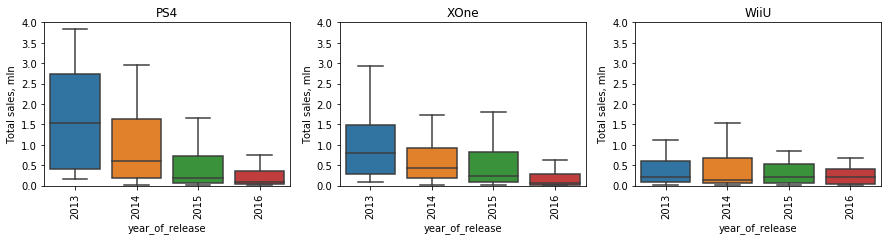

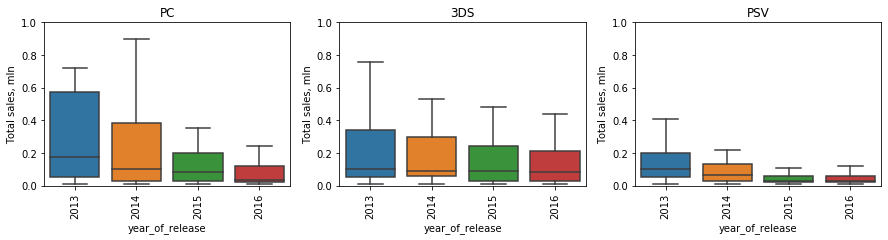

In [39]:
#plotting of boxplots of total sales of games by release year for each actual platform
print(BOLD + 'Boxblots of total sales for actual platforms by release year:'  + END)
for name, lims in zip(actual_platforms.keys(), [(0, 3), (0, 4), (0, 1)]):
    boxplot_platform_features_by_years_in_row(games_data[games_data.year_of_release>2012],
                                              actual_platforms[name], 'total_sales', 'Total sales, mln',
                                              lims)

It looks like sales for all current platforms except for both versions of the Nintendo Wii for each next release year are less than the previous one. But the total sales volume includes all sales from the moment the game was released until the current moment, so in order to assess the dynamics of changes in sales, it is necessary to normalize them to the lifetime of the game.

Let us now normalize sales for the lifetime of the game.

Boxblots of total sales normalized for the game lifetime:


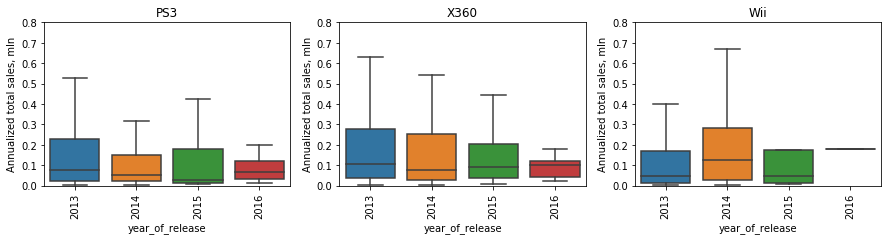

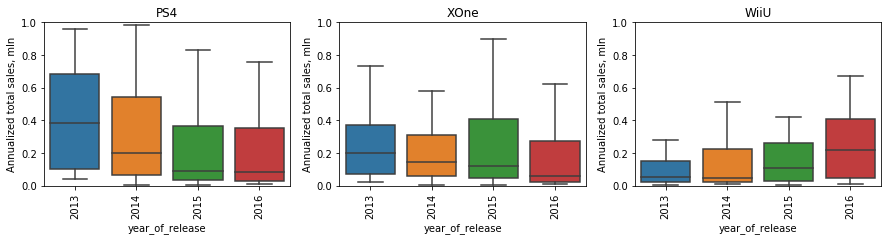

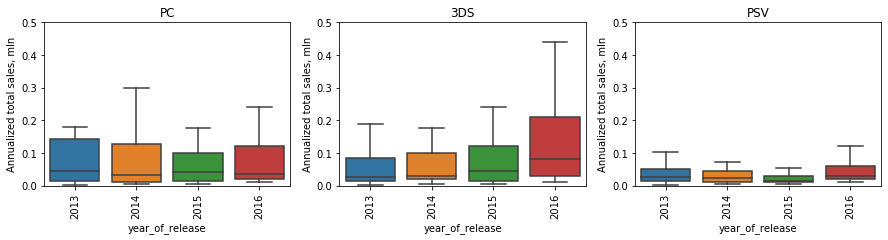

In [40]:
#calculating the age of the game
games_data['game_age'] = games_data.merge(platform_lifetime.reset_index(), on=['platform'], how='left').max_date\
                             - games_data.year_of_release + 1

#plotting of boxplots of annual total sales of games by release year for each actual platform
print(BOLD + 'Boxblots of total sales normalized for the game lifetime:'  + END)
for name, lims in zip(actual_platforms.keys(), [(0, 0.8), (0, 1), (0, 0.5)]):
    boxplot_platform_features_by_years_in_row(games_data.assign(annual_sales=games_data.total_sales\
                                                                                /(games_data.game_age))\
                                                  [games_data.year_of_release>2012],
                                              actual_platforms[name], 'annual_sales',
                                              'Annualized total sales, mln', lims)

The annualized sales for handheld consoles the Nintendo 3DS and the PlayStation Vita (PSV), as well as for the Nintendo Wii U are growing, while for the PlayStation 4 and the Xbox One there is still a downtrend.

We will look at the global sales of all games, broken down by platform.

Boxblots of total sales by platforms:
Rem:To consider the distribution of sales, it is necessary to normalize sales over the lifetime of the games


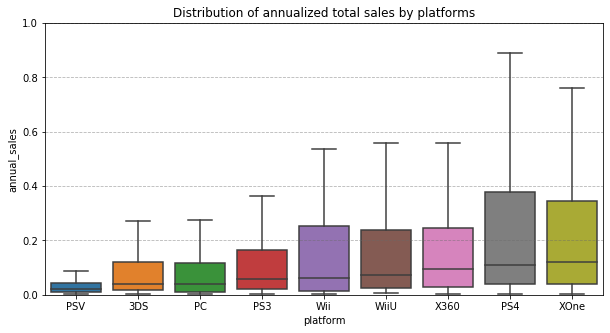

In [41]:
#function to plot boxplot of sales by platforms
def boxplot_sales_by_platforms(data, sales, lims=(0, 1), ax=None, title=None):
    if ax is None: 
        fig, ax = plt.subplots(figsize=(10, 5));
    sns.boxplot(x='platform', y=sales, ax=ax,
                data=data[data.platform.isin(data[data[sales]>0].groupby('platform').name.count().reset_index()\
                                                #there should be enough data
                                                .query('name>20').platform.values)],\
                order=data.groupby('platform')[sales].median().sort_values().reset_index().platform, showfliers = False)
    ax.set_title(title);
    ax.grid(axis='y', linestyle='--', color='dimgray', alpha=0.5)
    ax.set_ylim(lims);
  
print(BOLD + 'Boxblots of total sales by platforms:' + END)
print(BOLD + 'Rem:' + END\
    + 'To consider the distribution of sales, it is necessary to normalize sales over the lifetime of the games')
boxplot_sales_by_platforms(games_data.assign(annual_sales=games_data.total_sales/games_data.game_age)\
                              [games_data.platform.isin(actual_platforms_list)\
                               &(games_data.year_of_release>2012)],
                           'annual_sales', title='Distribution of annualized total sales by platforms')

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
It  is better to remove outliers to make the plot more informative, you can do it using the argument showfliers = False.
    
You can also limit upper outliers on the boxplot with ylim=(0, ...).

<div class="alert alert-info"> <b>Student comments:</b> I removed the outliers for all the boxplots.</div>

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
Great! Thanks for updating that. 

There are differences in the average sales volume for different platforms. For portable game consoles the PlayStation Vita (PSV) and the Nintendo 3DS, the average sales are the lowest, for the latest versions of the PlayStation and the Xbox consoles they are the highest. Note that the median is considered as the average sales due to the presence of outliers.

We must also have a look at the sales of all games, broken down by platform for each markets.

Boxblots of sales by platforms for each market:


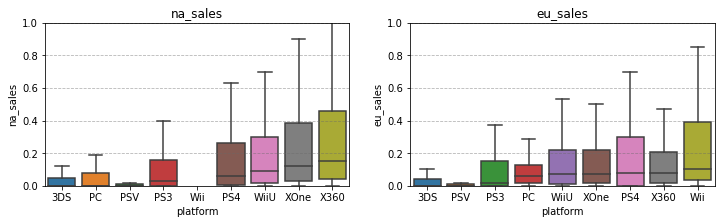

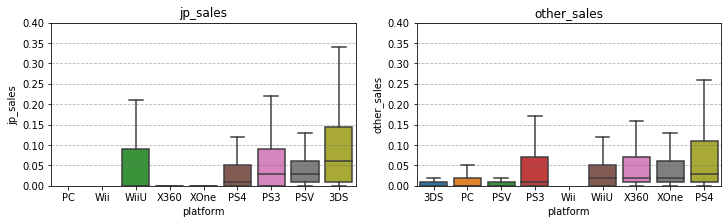

In [42]:
#function to plot boxplots of sales by platforms for different markets in line
def boxplot_sales_by_platforms_in_row(market_sales, lims):
    cols_num=len(market_sales)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(6*cols_num, 3))
    for i, market in enumerate(market_sales):
        boxplot_sales_by_platforms(games_data.assign(annual_sales=games_data[market]/games_data.game_age)\
                                          [games_data.platform.isin(actual_platforms_list)\
                                          &(games_data.year_of_release>2012)],
                                   market, lims, ax=axes[i])
        axes[i].set_title(market)
    plt.show()

#plotting boxplots of sales by platforms for different markets
print(BOLD + 'Boxblots of sales by platforms for each market:' + END)
for market_sales, lims in zip([['na_sales', 'eu_sales'], ['jp_sales', 'other_sales']], [(0, 1), (0, 0.4)]):
    boxplot_sales_by_platforms_in_row(market_sales, lims)

Different markets have their own sales leaders among consoles. Thus, for the North American market, sales of games on both versions of the Xbox are on average higher, but the lowest on portable consoles the Nintendo 3DS, the PlayStation Vita (PSV) and on PCs. In the European market, the Nintendo Wii is the leader, and handheld consoles also have low sales. For the Japanese market, sales of games on both handheld consoles are very high, as well as for both versions of the PlayStation consoles, while for other platforms they are quite low. For the rest of the markets, sales of games at PlayStation 4 are on average higher and lower for handheld consoles and PCs.

### Impact of user and critic reviews on sales

Now we will look at how user and professional reviews affect sales.

Scaterplots of 'total sales' and 'critic_score' by actual platforms:
Rem:We consider all historical data for platforms as most of the scores have been since 2000


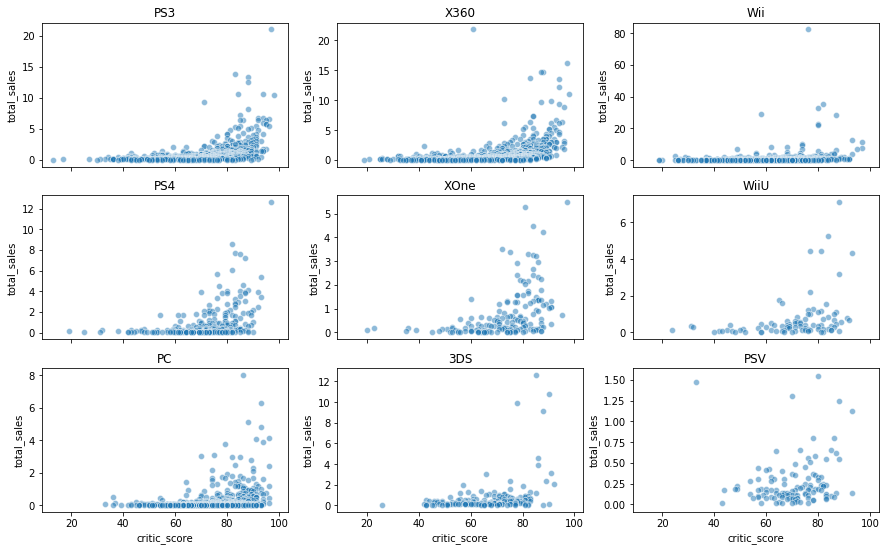

Heatmap for correlation matrix of market sales and 'critic_score' for all platforms with enough data:


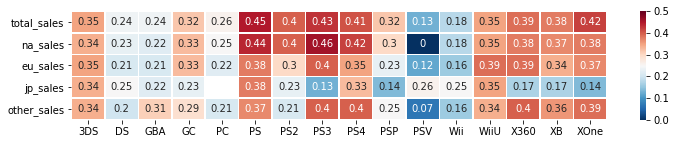

Scaterplots of 'total sales' and 'user_score' by actual platforms:
Rem:We consider all historical data for platforms as most of the scores have been since 2000


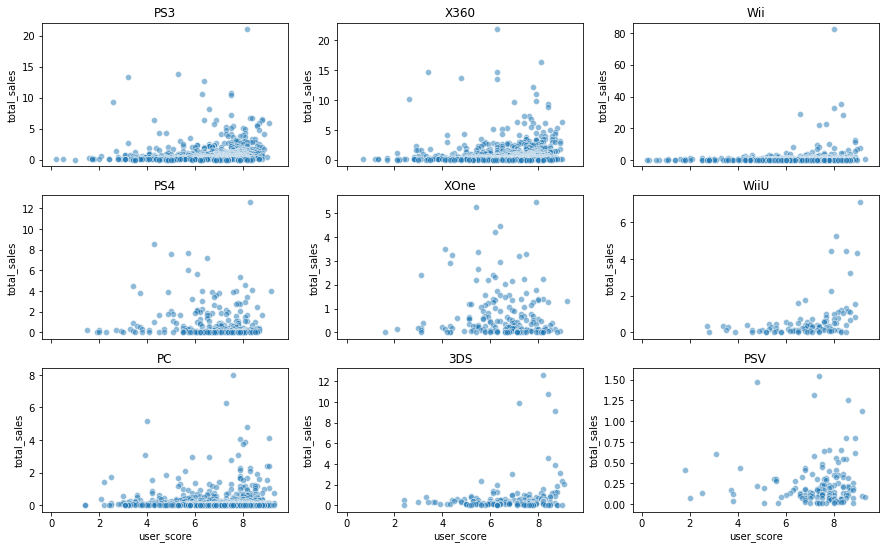

Heatmap for correlation matrix of market sales and 'user_score' for all platforms with enough data:


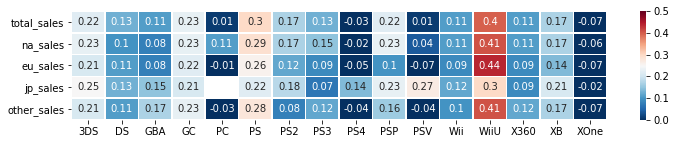

In [43]:
#function to plot scaterplot of sales and scores by platforms
def scatterplot_by_platforms(data, feature, sales):
    fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(5*3, 3*3), sharex=True)
    for i, consols in enumerate(actual_platforms.keys()):
        for j, platform in enumerate(actual_platforms[consols]):
            sns.scatterplot(data=data[(data.platform==platform)&(data[sales]!=0)], 
                            x=feature, y=sales, alpha=0.5, ax=axes[i, j]);
            axes[i, j].set_title(platform)
    plt.show()

#function to calculate correlation matrix between different market sales and scores by platforms
def corr_matrix(data, platforms, market_sales, feature, with_bestsellers):
    if with_bestsellers:
        return pd.DataFrame({platform: [round(data[(data.platform==platform)&(data[sales]!=0)]\
                                              [[feature, sales]].corr().iloc[0, 1], 2) \
                                                  for sales in market_sales]
                                       for platform in platforms}, index=market_sales)
    else:
        return pd.DataFrame({platform: [round(data[(data.platform==platform)&(data[sales]!=0)\
                                                   &(data['huge_'+sales]==False)]\
                                              [[feature, sales]].corr().iloc[0, 1], 2) \
                                                  for sales in market_sales]
                                       for platform in platforms}, index=market_sales)

#function to plot heatmap for correlation matrix
def heatmap(data, feature, sales, with_bestsellers=True):
    fig, ax = plt.subplots(figsize=(12,2)) 
    sns.heatmap(corr_matrix(data,
                            data.pivot_table(index='platform', values=feature, aggfunc='count')\
                                #there should be enough data
                                .query(feature + '>50').index,
                            sales, feature, with_bestsellers),
                annot=True, linewidths=.5, vmin=0, vmax=0.5, cmap='RdBu_r', ax=ax);
    plt.show()

#plotting scaterplots and heatmaps for correlation matrix for both scores
for feature in ['critic_score', 'user_score']:
    print(BOLD + "Scaterplots of 'total sales' and '" + feature + "' by actual platforms:" + END)
    print(BOLD + 'Rem:'+ END
              + 'We consider all historical data for platforms as most of the scores have been since 2000')
    scatterplot_by_platforms(games_data, feature, 'total_sales')
    print(BOLD + "Heatmap for correlation matrix of market sales and '" + feature 
              + "' for all platforms with enough data:" + END)
    heatmap(games_data, feature, ['total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'])

Total sales are positively correlated with critic scores for many platforms such as the PlayStations (all versions except portable one), the Xboxs (all versions) and the Nintendo 3DS and Wii U. Correlation is not high for all markets, for instance, for Japan in the case of later PlayStation models and for all over the Xbox versions. The PlayStation has the highest correlation in the US market, and for the Nintendo Wii U it is in the European market. In scatterplots, we see how far the bestsellers are from the bulk of the points, and they are concentrated in the area of high scores from critics. Apparently, to be a bestseller it is important to have a high critic score, or maybe critics choose games for review among the most sold, but there are very few bestsellers with low critical scores. The bestsellers can bias the correlation estimates.

For user scores, there is a positive correlation only for the Nintendo Wii U platform and slightly lower for the first version of the PlayStation. In the scatterplots, we also see that the bestsellers are far from the main mass of dots, but they are not all concentrated in the area of high user scores for most platforms.

Now we must look if any correlation exists without counting the bestsellers.

Scaterplots of 'total sales' and 'critic_score' by actual platforms without bestsellsers:
Rem:We consider all historical data for platforms as most of the scores have been since 2000


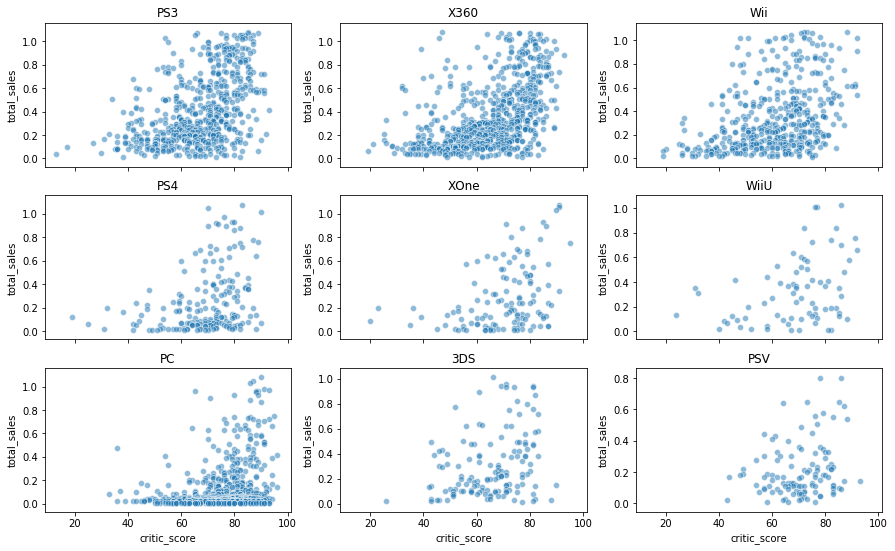

Heatmap for correlation matrix of market sales and 'critic_score' for all platforms without bestsellers:


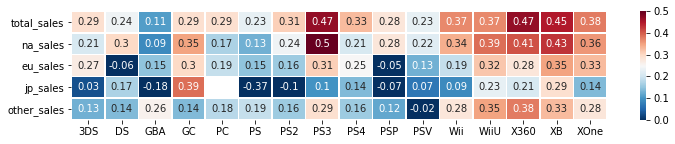

Scaterplots of 'total sales' and 'user_score' by actual platforms without bestsellsers:
Rem:We consider all historical data for platforms as most of the scores have been since 2000


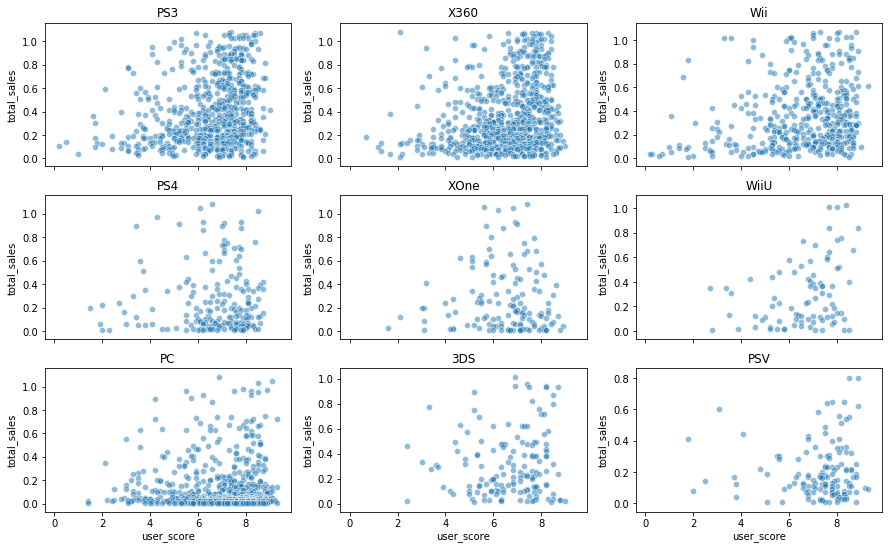

Heatmap for correlation matrix of market sales and 'user_score' for all platforms without bestsellers:


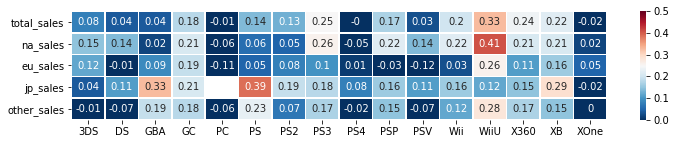

In [44]:
#plotting scaterplots and heatmaps for correlation matrix for both scores without bestsellers
for feature in ['critic_score', 'user_score']:
    print(BOLD + "Scaterplots of 'total sales' and '" + feature + "' by actual platforms without bestsellsers:" + END)
    print(BOLD + 'Rem:'+ END
              + 'We consider all historical data for platforms as most of the scores have been since 2000')
    scatterplot_by_platforms(games_data[games_data['huge_total_sales']==False], feature, 'total_sales')
    print(BOLD + "Heatmap for correlation matrix of market sales and '" + feature 
              + "' for all platforms without bestsellers:" + END)
    heatmap(games_data, feature, ['total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'], False)

After removing the bestsellers, a positive correlation with critic scores remained for all versions of the Xbox (again, except for the Japanese market), for the Nintendo Wii U and for the 3rd version of the PlayStation, and increased for the Nintendo Game Cube (GC) in the Japanese and North American markets. Note that there could also be low sales for relatively high critical scores, but a low score corresponds to a low sales level.

After removing the bestsellers, the high correlation with user scores remained only for Nintendo Wii U in the North American market and increased for the first version of the PlayStation in the Japanese market. Note that there could also be low sales for relatively high user scores for the Nintendo Wii U platform (see corresponding scatterplot).

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Well done! Very nice scatter plots and I totally agree with your conclusions. 
    


We will now have a look at couple of games, their sales and critics scores on different platforms.

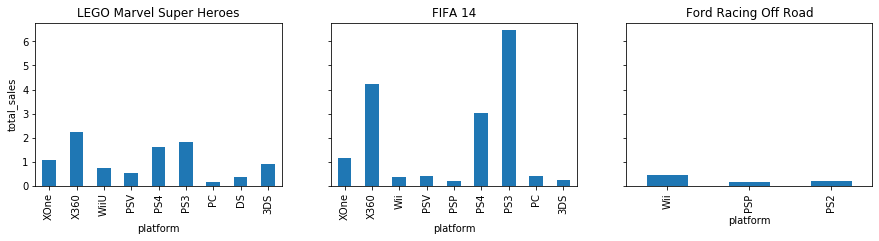

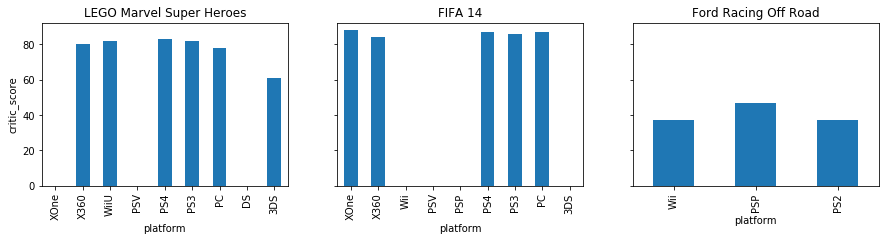

In [45]:
#function to plot barplots for feature for particular games and different platforms
def game_feature_by_platforms(data, games, feature):
    cols_num=len(games)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(5*cols_num, 3), sharey=True)
    for i, game in enumerate(games):
        data[data.name==game].sort_values('platform', ascending=False)\
            .plot(x='platform', y=feature, kind='bar', ax=axes[i]);
        axes[i].set_title(game)
        axes[i].set_ylabel(feature)
        axes[i].get_legend().remove()

#plotting barplots fot 'total_sales' and 'critic_score' for particular games and different platforms     
for feature in ['total_sales', 'critic_score']:
    game_feature_by_platforms(games_data, ['LEGO Marvel Super Heroes', 'FIFA 14', 'Ford Racing Off Road'],
                              feature)

Games with high sales tend to have high critic scores, but high critic scores do not always correspond to high sales.
Low scores usually correspond to low sales.

### The general distribution of games by genre

We will look at the general distribution of total sales of games by genre.

Boxblots of total sales by genres:


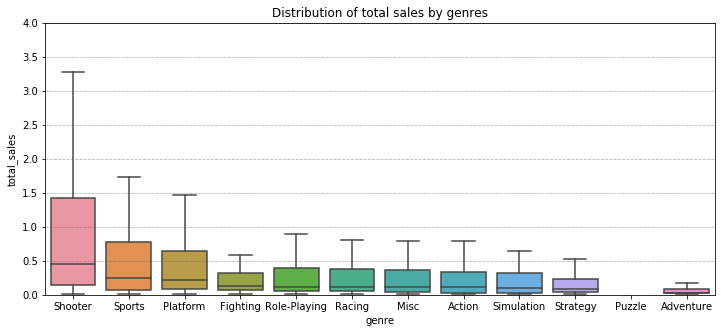

In [46]:
#function to plot boxplot of sales by genres
def boxplot_sales_by_genres(data, lims=(0, 4), ax=None, title=None):
    if ax is None: 
        fig, ax = plt.subplots(figsize=(12, 5));
    sns.boxplot(x='genre', y='total_sales', ax=ax, 
                data=data[data.genre.isin(data.groupby('genre').name.count().reset_index()\
                                              #there should be enough data
                                              .query('name>20').genre.values)],\
                order=data.groupby('genre').total_sales.median().sort_values(ascending=False).reset_index().genre, showfliers = False)
    ax.set_title(title);
    ax.grid(axis='y', linestyle='--', color='dimgray', alpha=0.5)
    ax.set_ylim(lims);

print(BOLD + 'Boxblots of total sales by genres:' + END)
boxplot_sales_by_genres(games_data[(games_data.platform.isin(actual_platforms_list))\
                             &(games_data.year_of_release>2012)],\
                        title='Distribution of total sales by genres')

The most profitable genre is Shooter. Sports and Platform games also have high sales, while Strategy and Adventure games have the lowest average sales. Perhaps for different consoles it will be different. Note that the median is considered as the average sales due to the presence of outliers.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>

Indeed here we have popular genre - action but if we calculate revenue per published game that could be not the case. 


Let us also look at the sales of all games, broken down by platform for each markets.

Boxblots of sales by genres for each actual platform:
Rem:We consider all historical data for actual platforms in order to have enough data in each genre


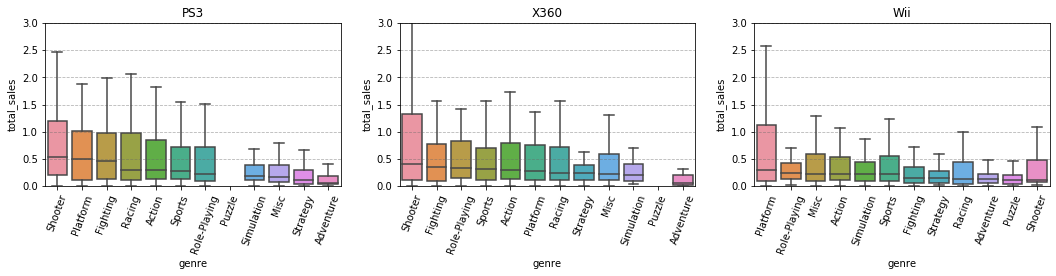

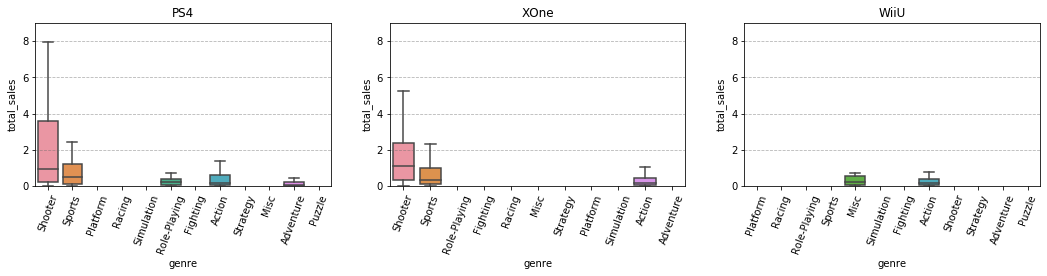

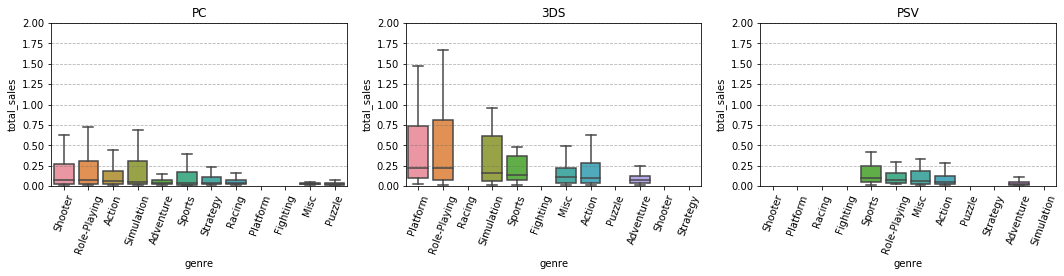

In [47]:
#function to plot boxplots of sales by platforms for different markets in line
def boxplot_sales_by_genres_in_row(platforms, lims):
    cols_num=len(platforms)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(6*cols_num, 3))
    for i, platform in enumerate(platforms):
        boxplot_sales_by_genres(games_data[games_data.platform==platform],
                                lims, ax=axes[i])
        axes[i].set_title(platform)
        axes[i].xaxis.set_tick_params(rotation=70)
    plt.show()

#plotting boxplots of sales by platforms for different markets
print(BOLD + 'Boxblots of sales by genres for each actual platform:' + END)
print(BOLD + 'Rem:' + END 
      + 'We consider all historical data for actual platforms in order to have enough data in each genre')
for name, lims in zip(actual_platforms.keys(), [(0, 3), (0, 9), (0, 2)]):
    boxplot_sales_by_genres_in_row(actual_platforms[name], lims)

There is quite a bit of data for different genres for some platforms, apparently due to the limited dateset. Shooters are also top-selling on many consoles, but for the Nintendo Wii and the Nintendo 3DS, Platform genre is the leader, and sales of Shooter games are below many other genres for the Nintendo Wii. Platform games as well as Fighting games are also among the top sellers on the PlayStation 3. For the Nintendo 3DS, Role-Playing and Simulation games have also taken the lead. Adventure games have the lowest sales across many platforms.

## Conclusion

#### Number of games released in different years

Before 2000, games were released separately for each platform, after that the same game was released for several platforms at once and the number of games released increases significantly till 2008. After 2012, the number of games released has dropped sharply. This looks odd and worth checking back. Perhaps for preparing the dataset it is used some kind of filters for games.

#### Platforms: sales and a lifetime

According to all historical data, PlayStation 2 is the absolute leader in sales (even if we exclude the bestsellers with huge sales) and in the number of games released for it among all platforms. The leaders also include 2 more versions of PlayStation: PS and PS3, and the Xbox 360 and the Nintendo Wii. The latest versions of these consoles lag far behind in total sales and the number of released games, due to the fact that sales include all sales from the moment the game was released until the current moment.

On average, platforms exist for 7.5 years, after which new games are no longer released for it. The new version of the console comes out in 6 year on average. Already before the release of the new version of the console, the number of games released begins to decline. For the new version of the console, only about 20 games are released in the first year.

If we consider the latest data (from 2013, when all the latest versions of consoles appeared), the PlayStation 4 is the leader in terms of total sales, although bestsellers make a big contribution. The PlayStation 3, the Xbox One, the Nintendo 3DS and the Xbox 360 are next on the list, their sales are comparable.

The annualized (to avoid cumulative effect) sales for handheld consoles the Nintendo 3DS and the PlayStation Vita, as well as for the Nintendo Wii U are growing, while for the PlayStation 4 and the Xbox One there is a downtrend.

There are differences in the average sales for different platforms. For portable game consoles the PlayStation Vita and the Nintendo 3DS, the average sales are the lowest, for the latest versions of the PlayStation and the Xbox consoles they are the highest.

Different markets have their own sales leaders among consoles. Thus, for the Japanese market, average sales of games on both handheld consoles the Nintendo 3DS and the PlayStation Vita are very high, as well as for both versions of the PlayStation consoles, while for other platforms they are quite low. For the rest of the markets, portable consoles sales are very low. Both latest versions of the Xbox are leading in the American market, while in the European market, the Nintendo Wii is the leader.

#### Impact of user and professional reviews on sales

The total sales are positively correlated with critical scores for all versions of the Xbox console, as well as for the latest version of Nintendo Wii U and for the previous version of PlayStation 3. For other versions of Playstation, a high correlation is obtained due to bestsellers with a huge sales, this is also true for portable Nintendo 3DS. Correlation is different for different markets, as there is on the whole no correlation for the Japanese market. Note that there are low sales for relatively high critical scores for these consoles, but a low score corresponds to a low sales level and the bestsellers are concentrated in the area of high scores from critics. Therefore, it is important not to have low scores from critics.

The sales are positively correlated with user scores only for the Nintendo Wii U in the North American. On other markets for this console correlation is high due to bestsellers with a huge sales. Note that there could also be low sales for relatively high user scores for the Wii U, but the bestsellers are concentrated in the area of high scores from users. Interestingly, that user preferences coincide with the desire to buy games only for this console.

#### The general distribution of games by genre

The most profitable genre is Shooter. Sports, Platform, Fighting, Role-Playing games also have high sales, while Strategy and Adventure games have the lowest average sales. Leaders may differ for different platforms.

## 4. Creating a user profile for each region

First let us look at the variation of market-share from region to region.

Market shares by platforms and genres:


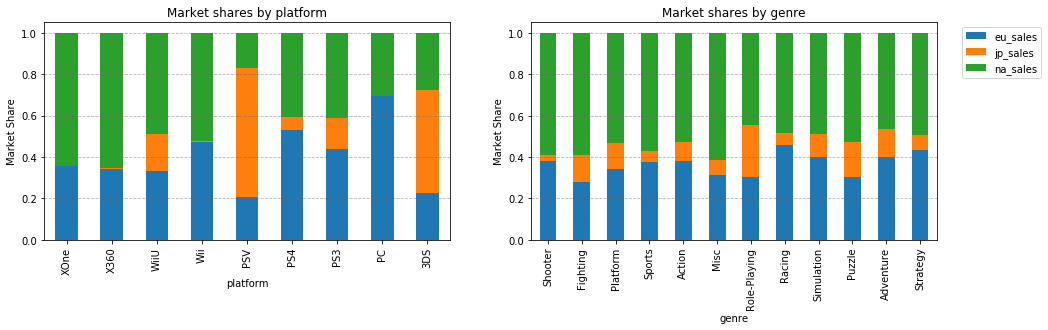

In [48]:
#function to calculate market shares for each region
def get_market_shares(data, feature):
    market_sales = data.pivot_table(index=feature,
                                    values=['na_sales', 'eu_sales', 'jp_sales'],
                                    aggfunc='sum')
    total_sales = market_sales.sum(axis=1)
    return round(market_sales.div(total_sales, axis=0), 3)

#function to plot market shares by platforms
def plot_market_share_by_platform(data, ax):
    get_market_shares(data, 'platform').sort_values('platform', ascending=False)\
        .plot(kind='bar', stacked=True, ax=ax);

#function to plot market shares by genres
def plot_market_share_by_genres(data, ax):
    get_market_shares(data, 'genre').join(data.groupby('genre').agg({'total_sales':'median'}))\
        .sort_values('total_sales', ascending=False)[['eu_sales', 'jp_sales', 'na_sales']]\
            .plot(kind='bar', stacked=True, ax=ax);

#plotting market shares by platforms and genres in row
print(BOLD + 'Market shares by platforms and genres:' + END)
fig, axes = plt.subplots(ncols=2, figsize=(8*2, 4))
plot_market_share_by_platform(games_data[(games_data.platform.isin(actual_platforms_list))\
                                         &(games_data.year_of_release>2012)],
                              axes[0])
plot_market_share_by_genres(games_data[games_data.platform.isin(actual_platforms_list)], axes[1])
for i, feature in enumerate(['platform', 'genre']):
    axes[i].set_ylabel('Market Share');
    axes[i].set_title('Market shares by ' + feature);
    axes[i].grid(axis='y', linestyle='--', color='dimgray', alpha=0.5)
axes[0].get_legend().remove()
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left');

For both versions of the Xbox the largest market share belongs to North America; in Japan, games for these consoles are practically not sold. The largest market share in Europe for the PC. For both versions of the PlayStation the market share in Europe is slightly higher than in North America, and relatively small for Japan. For the Nintendo Wii North America and Europe share the market equally; in Japan, games for these consoles are practically not sold. For the Nintendo Wii U the market share in North America is slightly higher than in Europe. For both versions of portoble consoles the largest market share belongs to Japan, for them North America and Europe share the market roughly equal.

For the top 5 genres, the majority of the market is in North America (genres in the barplot are sorted in descending order of average sales). Market share for Japan is uniformly small for all genres except Role-Playing.

Next, let us look if ESRB ratings affect sales in individual regions.

Distribution of sales by rating for each region:
Rem: We consider all historical data for actual platforms as most of the scores have been since 2000.
     Note, we only have enough data for ratings E, M, T, E10+.


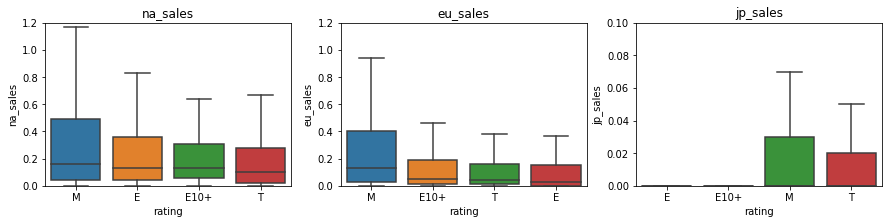

Let's see if we have enough observations for the ratings by regions:


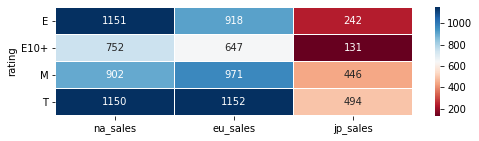

In [60]:
#function to plot boxplot of sales by ratings for different regions
def plot_sales_by_rating(data, sales_features, ylims):
    cols_num=len(sales_features)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(5*cols_num, 3))
    for i, feature in enumerate(sales_features):
        sns.boxplot(x='rating', y=feature, ax=axes[i], data=data,
                    order=data.groupby('rating')[feature].median().sort_values(ascending=False)\
                        .reset_index().rating, showfliers = False
                   );
        axes[i].set_ylim(ylims[i]);
        axes[i].set_title(feature);
    plt.show()

#ploting boxplot of sales by ratings for different regions
print(BOLD + 'Distribution of sales by rating for each region:' + END)
print(BOLD + 'Rem: ' + END 
      + 'We consider all historical data for actual platforms as most of the scores have been since 2000.')
print('     Note, we only have enough data for ratings E, M, T, E10+.')
plot_sales_by_rating(games_data[(games_data.platform.isin(actual_platforms_list))\
                             &(games_data.rating.isin(['E', 'M', 'T', 'E10+']))],
                     ['na_sales', 'eu_sales', 'jp_sales'], [(0, 1.2), (0, 1.2), (0, 0.1)])

#function to calculate the number of observation for each groups under consideration
def get_observation_number(data):
    return pd.DataFrame({sales_feature: data[data[sales_feature]>0].groupby('rating')[sales_feature].count() 
                             for sales_feature in ['na_sales', 'eu_sales', 'jp_sales']})
 
#plotting heatmap for the number of observation for each groups under consideration
print(BOLD + "Let's see if we have enough observations for the ratings by regions:" + END)
fig, ax = plt.subplots(figsize=(8, 2)) 
sns.heatmap(get_observation_number(games_data[(games_data.platform.isin(actual_platforms_list))\
                                  &(games_data.rating.isin(['E', 'M', 'T', 'E10+']))]),
             annot=True, linewidths=.5, cmap='RdBu', fmt='g', ax=ax);

On average, sales for different ratings differ only for the European region: sales for M rating are slightly higher. There is enough data for each rating, even for the Japan region, if we consider all the historical data for the actual platforms.

## Conclusion

For different platforms, market shares in different countries are different. Thus, for both versions of portoble consoles the PlayStation Vita and the Nintendo 3DS the largest market share belongs to Japan, games for the other consoles are practically not sold in Japan. For both versions of the Xbox the largest market share belongs to North America and North America has a slightly higher share of sales compared to Europe for the latest console the Nintendo Wii U. Europe has a slightly higher share of sales compared to North America for the both latest consoles the PlayStation. For the Nintendo Wii North America and Europe share the market equally.

For the top 5 genres, the majority of the market is in North America. Market share for Japan is uniformly small for all genres except Role-Playing.

On average, sales for different ratings differ only for the European region: sales for Adults (Mature) rating are slightly higher.

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Great! Everything is correct here.

One small comment regarding market shares by rating. It could be also helpful to understand proportion of unrated games per region, as this is quite an interesting information, especially for JP region.

<div class="alert alert-info"> <b>Student comments:</b> I tried to do this, but I couldn't understand hwo to incorporate it into the structure. Do I check na, eu and jp sales versus the 'is_tbd_score' column? I could not draw conclusions when I tried this.</div>

<div class="alert alert-warning">
<b>Reviewer's comment v2:</b>
    
Currently, you have nan values in the rating, so it is not visible on pie charts, but if you can replace it with 'unknown' or any other placeholder then you can get smth like this: 
    
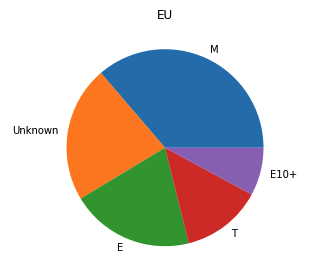    

## 5. Testing Hypothesis

### Average user ratings of the Xbox One and PC platforms are the same

Let us look at descriptive statictics and distribution of user scores for the Xbox One and the PC.

Desciptive statistics for user scores for the Xbox One and the PC:
PC


,count,min,max,mean,median,std,var
user_score,155.0,1.4,9.3,6.3,6.8,1.7,3.0



XOne


,count,min,max,mean,median,std,var
user_score,182.0,1.6,9.2,6.5,6.8,1.4,1.9



Distribution of user scores for the Xbox One and the PC:


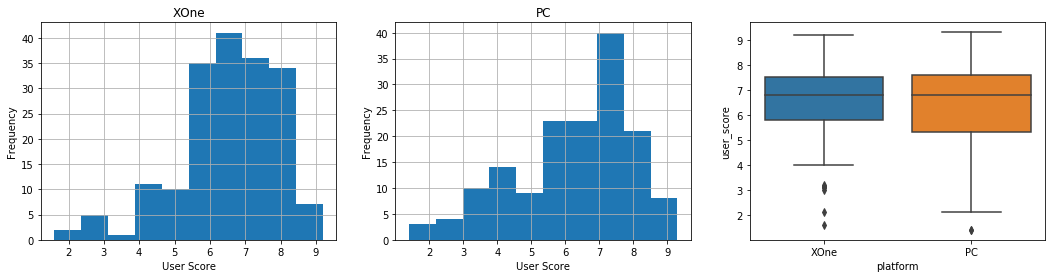

In [50]:
#function to print the descriptive statistics for user scores for set of values of some feature
def print_user_score_descriptive_statistics(data, feature, values):
    for name, group_data in data[data[feature].isin(values)].groupby(feature):
        print(BOLD + name + END)
        display(group_data[['user_score']].agg(['count', 'min', 'max', 'mean', 'median', 'std', 'var']).round(1).T)
        print()

#printing the descriptive statistics for user scores for the Xbox One and the PC
print(BOLD + 'Desciptive statistics for user scores for the Xbox One and the PC:' + END)
print_user_score_descriptive_statistics(games_data[games_data.year_of_release>2012], 'platform', ['XOne', 'PC'])

#function to plot histograms and boxplots for user scores for set of values of some feature
def plot_distribution_by_features_values(data, feature, values, bins_num=None):
    cols_num = len(values) + 1
    fig, axes = plt.subplots(ncols=cols_num, figsize=(6*cols_num, 4))
    for i, value in enumerate(values):
        data[data[feature]==value].user_score.hist(ax=axes[i], bins=bins_num)
        axes[i].set_title(value)
        axes[i].set_xlabel('User Score')
        axes[i].set_ylabel('Frequency')
    sns.boxplot(x=feature, y='user_score', data=data[data[feature].isin(values)],\
                ax=axes[cols_num-1]);

print(BOLD + 'Distribution of user scores for the Xbox One and the PC:' + END)
plot_distribution_by_features_values(games_data[games_data.year_of_release>2012], 'platform', ['XOne', 'PC'])

The median as well as other statistics except variation for user scores for the Xbox and the PC games are equal.

The distributions of the user scores random variable for both platforms does not have the form of a normal distribution.

But still, let us formally test if the distributions are normal.

Q-Q Plots for user ratings for the Xbox One platform and PC:


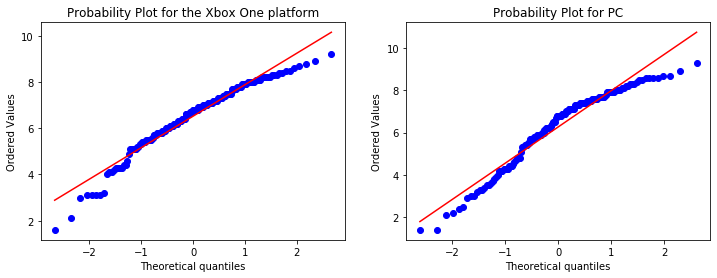

Shapiro-Wilk normality tests:
Hypotheses:
H₀: User ratings for the Xbox One platform is distributed normally
H₁: User ratings for the Xbox One platform is not distributed normally
Shapiro-Wilk normality test, p-value:  1.524856543255737e-05
We reject the hypothesis H₀

Hypotheses:
H₀: User ratings for PC is distributed normally
H₁: User ratings for PC is not distributed normally
Shapiro-Wilk normality test, p-value:  5.039790721639292e-06
We reject the hypothesis H₀



In [51]:
def norm_test(samples, sample_descriptions):
    print(BOLD + 'Q-Q Plots for user ratings for ' + ' and '.join(sample_descriptions) + ':' + END)
    fig, axes = plt.subplots(ncols=2, figsize=(6*2, 4))
    for i, (sample, descr) in enumerate(zip(samples, sample_descriptions)):
        st.probplot(sample.user_score.dropna(), dist="norm", plot=axes[i])
        axes[i].set_title('Probability Plot for ' + descr)
    plt.show()

    #Let's test the hypothesis that the distribution of samples is normal using the Shapiro-Wilk normality test
    print(BOLD + 'Shapiro-Wilk normality tests:' + END)
    alpha = 0.05
    for sample, descr in zip(samples, sample_descriptions):
        print('Hypotheses:')
        print(BOLD + 'H\u2080: User ratings for ' + descr + ' is distributed normally' + END)
        print(BOLD + 'H\u2081: User ratings for ' + descr + ' is not distributed normally' + END)
        norn_pvalue = st.shapiro(sample.user_score.dropna())[1]
        print("Shapiro-Wilk normality test, p-value: ", norn_pvalue)
        if (norn_pvalue < alpha): 
            print("We reject the hypothesis H\u2080") 
        else: 
            print("We can't reject the hypothesis H\u2080") 
        print()

#testing the hypothesis of normality of user scores for the Xbox One and the PC
norm_test([games_data[(games_data.year_of_release>2012)&(games_data.platform=='XOne')],
           games_data[(games_data.year_of_release>2012)&(games_data.platform=='PC')]],
          ['the Xbox One platform', 'PC'])

The distribution of user scores for both platforms is most likely different from the normal one, since the points on the Q-Q graph do not lie on a straight line, but are described by a non-linear curve.

Shapiro-Wilk normality tests also reject the hypothesis 𝐻0 that the distribution of samples is normal.

Thus, we can not use a parametric Student's t-test in order to compare the average user scores for the Xbox One and the PC.

Hence, we will now run Mann-Whitney U test in order to compare the average user scores for the Xbox One and the PC.

In [52]:
#function to run Mann-Whitney U test for user scores for different samples
def mann_whitneyu_test(sample1, sample2, description):
    print(BOLD + 'Mann-Whitney U test:' + END)
    alpha = 0.05
    print('Hypotheses:')
    print(BOLD + 'H\u2080: Sample distributions of user ratings ' + description + ' are equal.'+ END)
    print(BOLD +'H\u2081: Sample distributions of user ratings ' + description + ' are not equal.' + END)
    pvalue = st.mannwhitneyu(sample1, sample2, alternative='two-sided')[1]
    print("Mann-Whitney U test, p-value: ", pvalue)
    if (pvalue < alpha): 
        print("We reject the hypothesis H\u2080") 
    else: 
        print("We can't reject the hypothesis H\u2080") 

#running Mann-Whitney U test for user scores for the Xbox One and the PC
mann_whitneyu_test(games_data[(games_data.year_of_release>2012)&(games_data.platform=='XOne')].user_score.dropna(),
                   games_data[(games_data.year_of_release>2012)&(games_data.platform=='PC')].user_score.dropna(),
                   'of the Xbox One and PC platforms')

Mann-Whitney U test:
Hypotheses:
H₀: Sample distributions of user ratings of the Xbox One and PC platforms are equal.
H₁: Sample distributions of user ratings of the Xbox One and PC platforms are not equal.
Mann-Whitney U test, p-value:  0.5011006734622374
We can't reject the hypothesis H₀


The Mann-Whitney U test doesn't rejects the null hypothesis about equality of user scores distributions for the Xbox and the PC platforms at a significance level of 0.05. Thus, there is likely no difference between the samples.

### Average user ratings for the Action and Sports genres are different

First, we have a look at descriptive statictics and distribution of user scores for Action and Sport genres.

Desciptive statistics for user scores for Action and Sport genres:
Action


,count,min,max,mean,median,std,var
user_score,388.0,2.0,9.1,6.8,7.1,1.3,1.8



Sports


,count,min,max,mean,median,std,var
user_score,159.0,0.2,8.8,5.2,5.5,1.8,3.2



Distribution of user scores for Action and Sport genres:


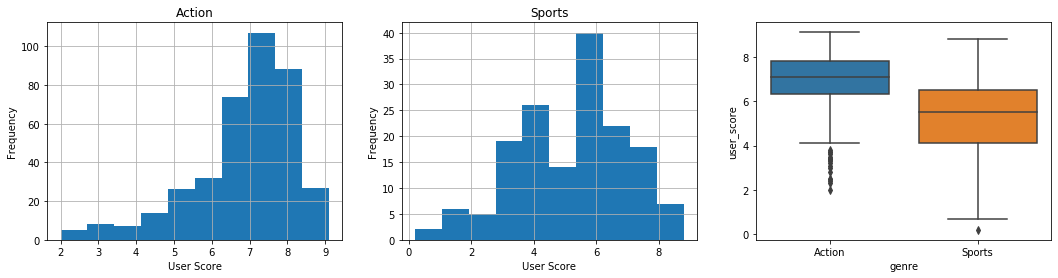

In [53]:
#printing the descriptive statistics for user scores for Action and Sport genres
print(BOLD + 'Desciptive statistics for user scores for Action and Sport genres:' + END)
print_user_score_descriptive_statistics(games_data[games_data.platform.isin(actual_platforms_list)\
                                                   &(games_data.year_of_release>2012)], 
                                        'genre', ['Action', 'Sports'])

print(BOLD + 'Distribution of user scores for Action and Sport genres:' + END)
plot_distribution_by_features_values(games_data[games_data.platform.isin(actual_platforms_list)\
                                                   &(games_data.year_of_release>2012)],
                                     'genre', ['Action', 'Sports'])

The medians for user scores for the Action and Sport games are shifted relative to each other.

The distributions of the user scores random variable for both genres does not have the form of a normal distribution.

But we will formally test the hypothesis that the distribution of samples is normal.

Q-Q Plots for user ratings for Action genre and Sports genre:


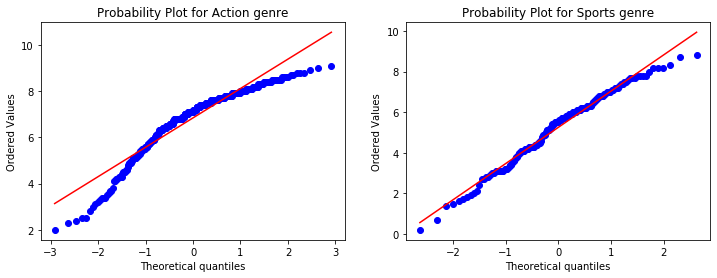

Shapiro-Wilk normality tests:
Hypotheses:
H₀: User ratings for Action genre is distributed normally
H₁: User ratings for Action genre is not distributed normally
Shapiro-Wilk normality test, p-value:  9.09465204697573e-15
We reject the hypothesis H₀

Hypotheses:
H₀: User ratings for Sports genre is distributed normally
H₁: User ratings for Sports genre is not distributed normally
Shapiro-Wilk normality test, p-value:  0.028929850086569786
We reject the hypothesis H₀



In [54]:
#testing the hypothesis of normality of user scores for Action and Sport genres
norm_test([games_data[games_data.platform.isin(actual_platforms_list)&(games_data.year_of_release>2012)\
                      &(games_data.genre=='Action')],
           games_data[games_data.platform.isin(actual_platforms_list)&(games_data.year_of_release>2012)&\
                      (games_data.genre=='Sports')]],
          ['Action genre', 'Sports genre'])

The distribution of user scores for both genres is most likely different from the normal one, since the points on the Q-Q graph do not lie on a straight line, but are described by a non-linear curve, although for the Sport genre they are quite close to straight line.

Shapiro-Wilk normality tests also reject the hypothesis 𝐻0 that the distribution of samples is normal.

Thus, we can not use a parametric Student's t-test in order to compare the average user scores for Action and Sport genres.

And hence, we will run Mann-Whitney U test for user scores for Action and Sport genres.

In [55]:
mann_whitneyu_test(games_data[games_data.platform.isin(actual_platforms_list)&(games_data.year_of_release>2012)\
                              &(games_data.genre=='Action')].user_score.dropna(),
                   games_data[games_data.platform.isin(actual_platforms_list)&(games_data.year_of_release>2012)\
                              &(games_data.genre=='Sports')].user_score.dropna(),
                   'of the Action and Sports genre')

Mann-Whitney U test:
Hypotheses:
H₀: Sample distributions of user ratings of the Action and Sports genre are equal.
H₁: Sample distributions of user ratings of the Action and Sports genre are not equal.
Mann-Whitney U test, p-value:  2.163238883737244e-23
We reject the hypothesis H₀


The Mann-Whitney U test rejects the null hypothesis about equality of user scores distributions for Action and Sport genres. Thus, there is likely some difference between the samples. The median of the user scores Action games is 7.1. The median of the user scores is 5.5. The user rating for Action games is higher than for Sport games in average.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
You did a great job! Hypotheses have been tested correctly. 


## Conclusion

The null hypothesis that the average user score of the Xbox One and PC are equal against the two-sided alternative is not rejected at the 5% significance level using a nonparametric rank Mann-Whitney U test. We can not use the Student's t-test due to violation of the assumption of normality.

The null hypothesis that the average user score for the Action and Sports genres are equal against the two-sided alternative is rejected at the 5% significance level using a nonparametric rank Mann-Whitney U test. We can not use the Student's t-test due to violation of the assumption of normality. The median of the user scores Action games is 7.1. The median of the user scores is 5.5. The user rating for Action games is higher than for Sport games in average.

## 6. Overall Conclusion

There are historical data of the online video game store with user and expert reviews, genres, platforms, and game sales to further assess analyze whether a game succeeds or not on a particular platform or region.

The dataset contains information about almost 17 thousand video games released for 37 years, from 1980 to 2016, in the markets of North America, Europe, Japan and other countries. There are 31 gaming platforms and 12 game genres.

Before proceeding to the analysis, the data was preprocessed:

- After a general review of the data revealed:

    - unknown values for names and genres for a couple of games.
    - misssing values for year of release, critic and user scores, and ESRB ratings.
    - there are games with huge sales.
    - duplicated game.

- Two not actual games with unknown name have been removed.

- The some types were converted to appropriate ones.

- Some of the missing values for the release year have been restored from game name containing the year, other missing values were investigated, and some were dropped.

- The duplicate game has been removed.

- For further analysis, the total sales over all markets was calculated. To mark the besselers, the corresponding boolean features have been added for each market.

During the analysis, the following patterns were identified:

- The number of games released recently is significantly less than the games released before 2012. It is necessary to check why the list of games is shortened in the data.
- Platforms exist for 7.5 years on average. The new version of the console comes out in 6 years on average. We should not bet on platforms that have existed for more than 6 years. Already before the release of the new version of the console, the number of games released begins to decline and with it sales also begin to decline. It might be a sign.
- Potentially profitable platforms will be:

    - The last version of PlayStation, since this console had the greatest total sales for any generations during the whole history, there are a lot fo games were released for this consol, and last version has the highest average sales.
    - The last version of Xbox, since it has performed well for past generations and the latest version has large average sales.
    - The Nintendo 3DS, since this portable console could be an alternative for home consols, its average sales are growing and it is very popular in some regions

\* Note that markets are characterized by different sales leaders. So, in the European market, the leader in average sales is the Nintendo Wii, in the American market, both versions of Xbox are in the leaders, and for the Japanese market, both portable consoles the Nintendo 3DS and the PlayStation Vita are leaders. Market shares are allocated accordingly.

- Games with high sales tend to have high critic scores, but high critic scores do not always correspond to high sales, despite the positive correlation established for all generations of the Xbox, for the Nintendo Wii U and for the other PlayStation versions. Low scores usually correspond to low sales. Therefore, it is important not to have low scores from critics. To be a bestseller it is important to have a high critic score, or maybe critics choose games for review among the most sold, but there are very few bestsellers with low critical scores.
- The sales are positively correlated with user scores for Nintendo Wii U in the North American and in other markets due to bestsellers. There could also be low sales for relatively high user scores for this console, but the bestsellers are concentrated in the area of high scores from users. It may be worth paying attention to user scores on this console.
- The sales in all markets except Japanese are lower in average for games with missing ESRB ratings or scores. The lack of a rating or scores may be due to the low popularity of the game or rare sales, but in any case, it is better to consider games that have both a rating and scores.
- The most profitable genre is Shooter. Sports, Platform, Fighting, Role-Playing games also have high sales. It makes sense to choose games of these genres. Strategy and Adventure games have the lowest average sales. Better to exclude games of these genres. Note that sales in different genres may vary depending on the region, it should be taken into account.
- The sales for Adults (Mature) rating are slightly higher on average for the European region. In this region, we could give preference to games with this rating.
- The user rating for Action games is higher than for Sport games in average. Perhaps this genre should be preferred. Note that high user ratings can be associated with high sales only on the Nintendo Wii U platform.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Overall you conducted outstanding research with correct interim findings, clean code and nice visualisation.
I like your overall conclusion. It is very structured and provides insights from your analysis.

